In [1]:
import requests
import pandas as pd
import numpy as oy
import yfinance as yf
import matplotlib.pyplot as plt




#first part of the analysis

In [2]:
#Create a DataFrame of top 10 stock in Yahoo Finance from 01-01-2012 - 31-12-2022

def fetch_sp500_companies():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    html = requests.get(url).content
    df_list = pd.read_html(html)
    sp500_df = df_list[0]
    return sp500_df[['Symbol', 'Security', 'GICS Sector', 'GICS Sub-Industry', 'Headquarters Location']]

def fetch_market_caps(symbols):
    market_caps = {}
    for symbol in symbols:
        try:
            info = yf.Ticker(symbol).info
            if 'marketCap' in info:
                market_caps[symbol] = {'Market Cap': info['marketCap'], 'Company Name': info['longName'], 'Location': info['city']}
        except Exception as e:
            print(f"Error fetching market cap data for {symbol}: {e}")
            continue
    return market_caps

def format_market_cap(market_cap):
    if market_cap >= 10**12:
        return f"{market_cap / 10**12:.2f}T"
    elif market_cap >= 10**9:
        return f"{market_cap / 10**9:.2f}B"
    elif market_cap >= 10**6:
        return f"{market_cap / 10**6:.2f}M"
    else:
        return f"{market_cap}"

def fetch_top_stocks():
    sp500_symbols = fetch_sp500_companies()['Symbol'].tolist()
    market_caps = fetch_market_caps(sp500_symbols)
    top_stocks = sorted(market_caps.items(), key=lambda item: item[1]['Market Cap'], reverse=True)[:10]
    return top_stocks

# Fetch top stocks
top_stocks = fetch_top_stocks()

# Convert the result into a DataFrame
data = [{'Symbol': stock[0],
         'Company Name': stock[1]['Company Name'],
         'Location': stock[1]['Location'],
         'Market Cap': format_market_cap(stock[1]['Market Cap'])} for stock in top_stocks]

df = pd.DataFrame(data)

# Initialize a dictionary to store stock data
stock_data = {}

# Download stock data for all stocks available in df
for symbol in df['Symbol']:
    try:
        stock_data[symbol] = yf.download(symbol, start="2012-01-01", end="2022-12-31")
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")
        continue

# Convert stock_data into a single DataFrame
all_stock_data = pd.concat(stock_data.values(), keys=stock_data.keys(), names=['Symbol', 'Date'])

# Reset index to make Symbol and Date as columns
all_stock_data.reset_index(inplace=True)


# Merge with the DataFrame containing company information
all_stock_data = pd.merge(all_stock_data, df[['Symbol', 'Company Name', 'Location']], on='Symbol', how='left')

# Display the updated DataFrame
print(all_stock_data.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

  Symbol       Date       Open       High        Low      Close  Adj Close  \
0   MSFT 2012-01-03  26.549999  26.959999  26.389999  26.770000  21.200520   
1   MSFT 2012-01-04  26.820000  27.469999  26.780001  27.400000  21.699436   
2   MSFT 2012-01-05  27.379999  27.730000  27.290001  27.680000  21.921190   
3   MSFT 2012-01-06  27.530001  28.190001  27.530001  28.110001  22.261728   
4   MSFT 2012-01-09  28.049999  28.100000  27.719999  27.740000  21.968706   

     Volume           Company Name Location  
0  64731500  Microsoft Corporation  Redmond  
1  80516100  Microsoft Corporation  Redmond  
2  56081400  Microsoft Corporation  Redmond  
3  99455500  Microsoft Corporation  Redmond  
4  59706800  Microsoft Corporation  Redmond  


In [3]:
unique_symbols = all_stock_data['Symbol'].unique().tolist()

unique_symbols

['MSFT',
 'AAPL',
 'NVDA',
 'GOOG',
 'GOOGL',
 'AMZN',
 'META',
 'LLY',
 'AVGO',
 'TSLA']

In [81]:
all_stock_data

Symbol        Open        High         Low       Close   Adj Close  \
Date                                                                            
2012-01-03   NVDA    0.357500    0.360000    0.350250    0.351000    0.321947   
2012-01-04   NVDA    0.351250    0.356500    0.348000    0.355000    0.325615   
2012-01-05   NVDA    0.353250    0.369500    0.351750    0.367750    0.337310   
2012-01-06   NVDA    0.367500    0.367750    0.359250    0.363500    0.333412   
2012-01-09   NVDA    0.363750    0.370500    0.361000    0.363500    0.333412   
...           ...         ...         ...         ...         ...         ...   
2022-12-23   TSLA  126.370003  128.619995  121.019997  123.150002  123.150002   
2022-12-27   TSLA  117.500000  119.669998  108.760002  109.099998  109.099998   
2022-12-28   TSLA  110.349998  116.269997  108.239998  112.709999  112.709999   
2022-12-29   TSLA  120.389999  123.570000  117.500000  121.820000  121.820000   
2022-12-30   TSLA  119.949997  124.480003  119.750000  123.180000  123.180000   

               Volume        Company Name     Location  
Date                                                    
2012-01-03  468044000  NVIDIA Corporation  Santa Clara  
2012-01-04  347372000  NVIDIA Corporation  Santa Clara  
2012-01-05  563548000  NVIDIA Corporation  Santa Clara  
2012-01-06  533252000  NVIDIA Corporation  Santa Clara  
2012-01-09  508244000  NVIDIA Corporation  Santa Clara  
...               ...                 ...          ...  
2022-12-23  166989700         Tesla, Inc.       Austin  
2022-12-27  208643400         Tesla, Inc.       Austin  
2022-12-28  221070500         Tesla, Inc.       Austin  
2022-12-29  221923300         Tesla, Inc.       Austin  
2022-12-30  157777300         Tesla, Inc.       Austin  

[27585 rows x 9 columns]

In [6]:
#summary of the data
all_stock_data.info()
all_stock_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27585 entries, 0 to 27584
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Symbol        27585 non-null  object        
 1   Date          27585 non-null  datetime64[ns]
 2   Open          27585 non-null  float64       
 3   High          27585 non-null  float64       
 4   Low           27585 non-null  float64       
 5   Close         27585 non-null  float64       
 6   Adj Close     27585 non-null  float64       
 7   Volume        27585 non-null  int64         
 8   Company Name  27585 non-null  object        
 9   Location      27585 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 2.1+ MB


Date          Open          High  \
count                          27585  27585.000000  27585.000000   
mean   2017-07-10 00:04:26.231647488     91.869367     92.989253   
min              2012-01-03 00:00:00      0.287250      0.290750   
25%              2014-10-14 00:00:00     22.687500     22.988832   
50%              2017-07-11 00:00:00     53.560001     54.099998   
75%              2020-04-07 00:00:00    128.429993    130.032501   
max              2022-12-30 00:00:00    677.549988    677.760010   
std                              NaN    101.665103    102.992413   

                Low         Close     Adj Close        Volume  
count  27585.000000  27585.000000  27585.000000  2.758500e+04  
mean      90.705515     91.879075     87.155829  1.005981e+08  
min        0.278750      0.284500      0.260951  1.584340e+05  
25%       22.396053     22.681982     22.042000  1.779800e+07  
50%       52.930000     53.560001     50.034576  4.108360e+07  
75%      126.768997    128.419998    122.435669  9.868000e+07  
max      669.119995    674.280029    636.024109  3.692928e+09  
std      100.263508    101.663147     96.758490  1.654264e+08

In [55]:
#Second Part of Analysis. The Analysis

In [7]:
new_stock_data = all_stock_data.copy()
new_stock_data.head()

Symbol       Date     Open     High      Low    Close  Adj Close     Volume  \
0   NVDA 2012-01-03  0.35750  0.36000  0.35025  0.35100   0.321947  468044000   
1   NVDA 2012-01-04  0.35125  0.35650  0.34800  0.35500   0.325616  347372000   
2   NVDA 2012-01-05  0.35325  0.36950  0.35175  0.36775   0.337310  563548000   
3   NVDA 2012-01-06  0.36750  0.36775  0.35925  0.36350   0.333412  533252000   
4   NVDA 2012-01-09  0.36375  0.37050  0.36100  0.36350   0.333412  508244000   

         Company Name     Location  
0  NVIDIA Corporation  Santa Clara  
1  NVIDIA Corporation  Santa Clara  
2  NVIDIA Corporation  Santa Clara  
3  NVIDIA Corporation  Santa Clara  
4  NVIDIA Corporation  Santa Clara

In [8]:
new_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27585 entries, 0 to 27584
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Symbol        27585 non-null  object        
 1   Date          27585 non-null  datetime64[ns]
 2   Open          27585 non-null  float64       
 3   High          27585 non-null  float64       
 4   Low           27585 non-null  float64       
 5   Close         27585 non-null  float64       
 6   Adj Close     27585 non-null  float64       
 7   Volume        27585 non-null  int64         
 8   Company Name  27585 non-null  object        
 9   Location      27585 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 2.1+ MB


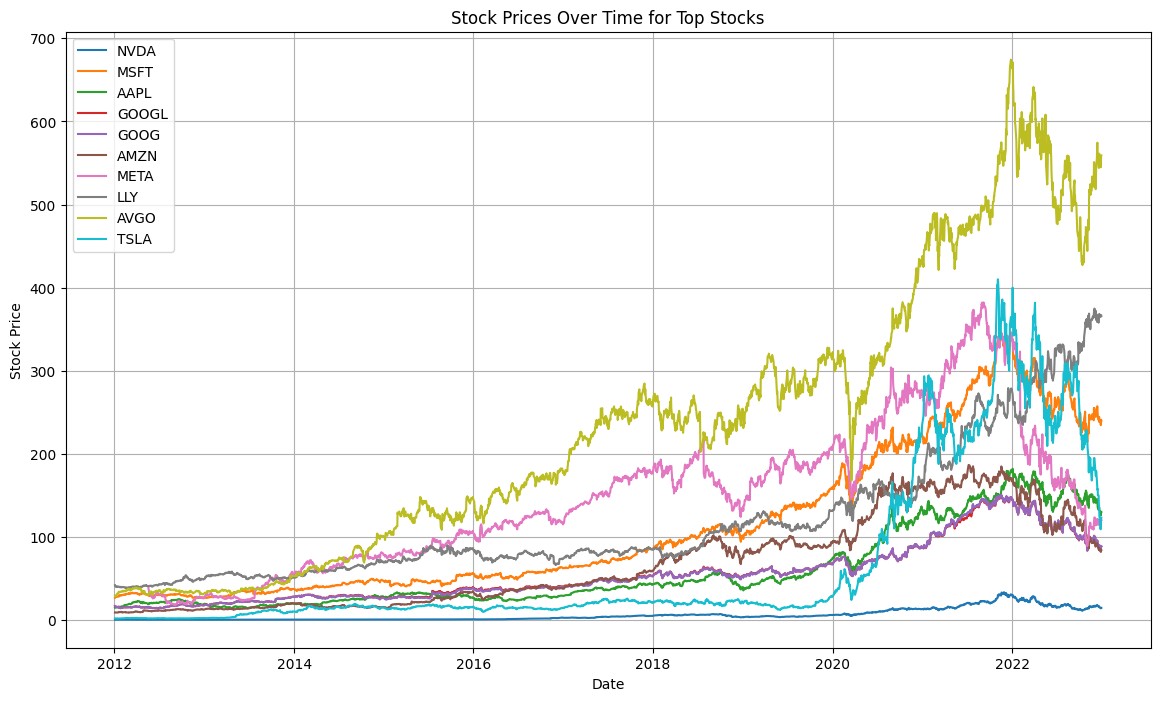

In [9]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Iterate through each symbol and plot the stock prices
for symbol in df['Symbol']:
    # Filter data for the current symbol
    stock_data_symbol = new_stock_data[new_stock_data['Symbol'] == symbol]
    
    # Plot the Date against the Close price for the current symbol
    plt.plot(stock_data_symbol['Date'], stock_data_symbol['Close'], label=symbol)

# Set plot title and labels
plt.title('Stock Prices Over Time for Top Stocks')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


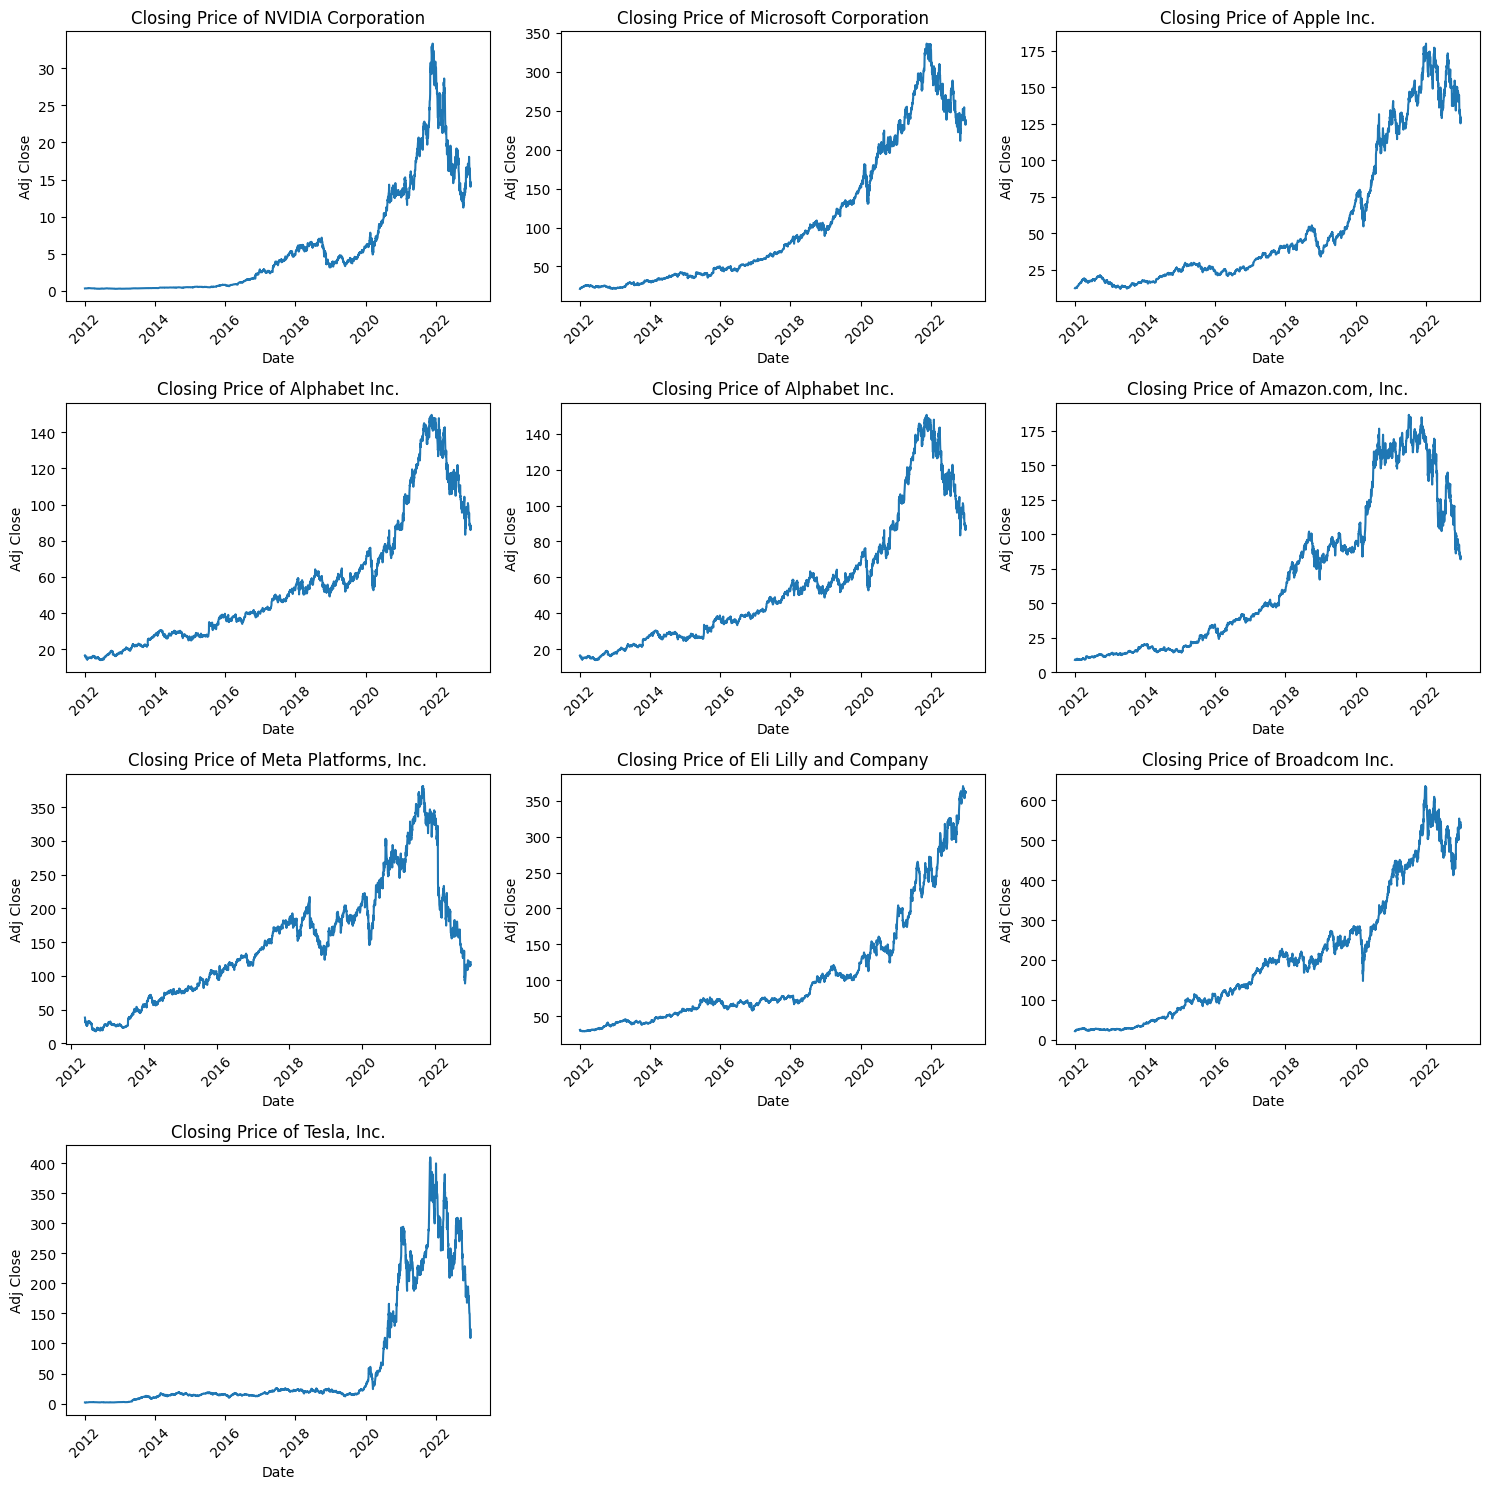

In [11]:
import matplotlib.pyplot as plt

# Assuming new_stock_data is already defined and contains your stock data

# Calculate number of rows and columns for subplot grid
num_stocks = len(df)  # Assuming df is the DataFrame containing top 10 stocks info
num_cols = 3  # Number of columns in the grid
num_rows = (num_stocks + num_cols - 1) // num_cols  # Calculate number of rows needed

# Let's see a historical view of the closing price
plt.figure(figsize=(15, 15))  # Adjust figure size as needed
plt.subplots_adjust(top=1.1, hspace=0.4)

# Iterate over each stock symbol in df
for i, symbol in enumerate(df['Symbol'], 1):
    plt.subplot(num_rows, num_cols, i)  # Create subplot
    stock_data_symbol = new_stock_data[new_stock_data['Symbol'] == symbol]  # Filter data for current symbol
    plt.plot(stock_data_symbol['Date'], stock_data_symbol['Adj Close'])  # Plot Adj Close prices
    plt.ylabel('Adj Close')  # Label for y-axis
    plt.xlabel('Date')  # Label for x-axis
    plt.title(f"Closing Price of {df[df['Symbol'] == symbol]['Company Name'].iloc[0]}")  # Title for the subplot
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot


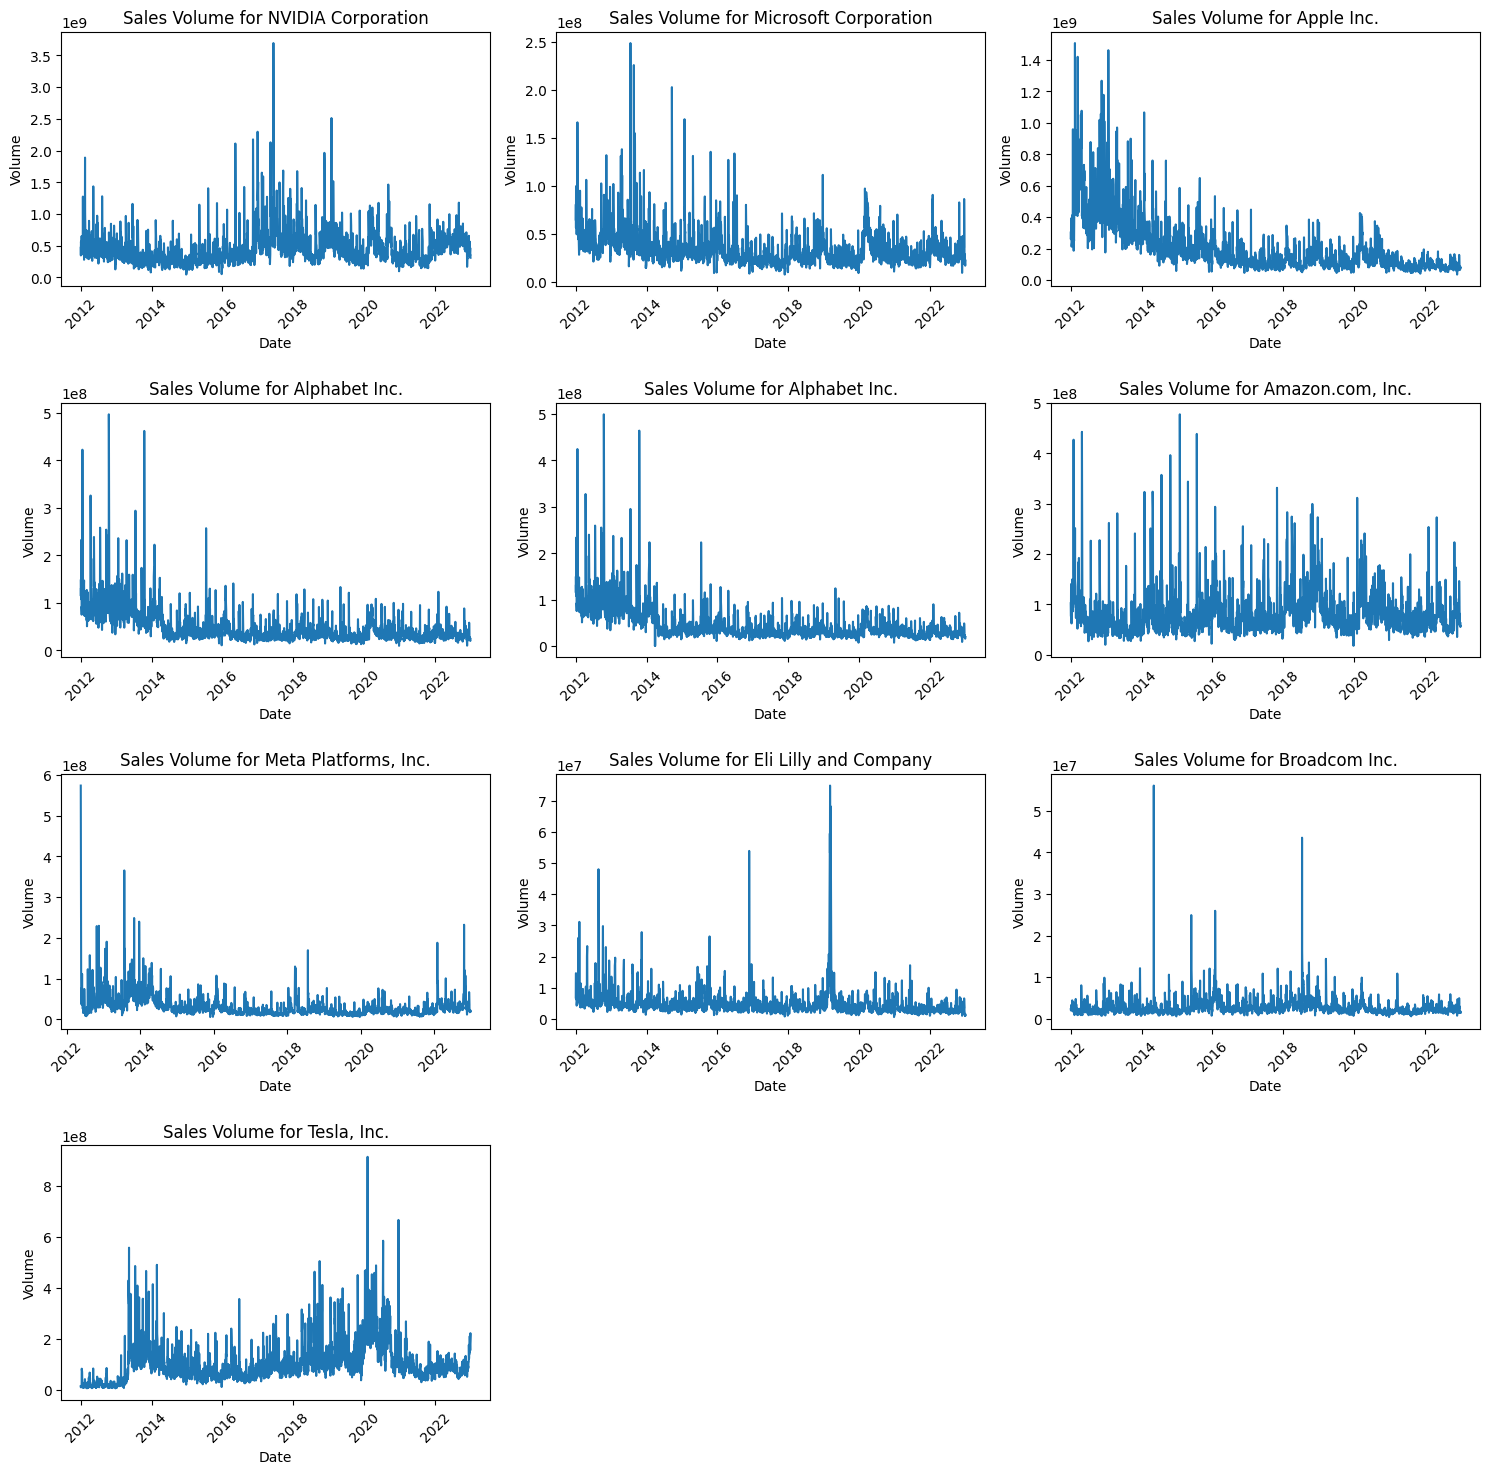

In [12]:
import matplotlib.pyplot as plt

# Assuming new_stock_data is already defined and contains your stock data

# Calculate number of rows and columns for subplot grid
num_stocks = len(df)  # Assuming df is the DataFrame containing top 10 stocks info
num_cols = 3  # Number of columns in the grid
num_rows = (num_stocks + num_cols - 1) // num_cols  # Calculate number of rows needed

# Let's see a historical view of the trading volume
plt.figure(figsize=(15, 15))  # Adjust figure size as needed
plt.subplots_adjust(top=1.1, hspace=0.4)

# Iterate over each stock symbol in df
for i, symbol in enumerate(df['Symbol'], 1):
    plt.subplot(num_rows, num_cols, i)  # Create subplot
    stock_data_symbol = new_stock_data[new_stock_data['Symbol'] == symbol]  # Filter data for current symbol
    plt.plot(stock_data_symbol['Date'], stock_data_symbol['Volume'])  # Plot Volume data
    plt.ylabel('Volume')  # Label for y-axis
    plt.xlabel('Date')  # Label for x-axis
    plt.title(f"Sales Volume for {df[df['Symbol'] == symbol]['Company Name'].iloc[0]}")  # Title for the subplot
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot


c:\Users\mohamad.illham\AppData\Local\Programs\Python\Python312\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


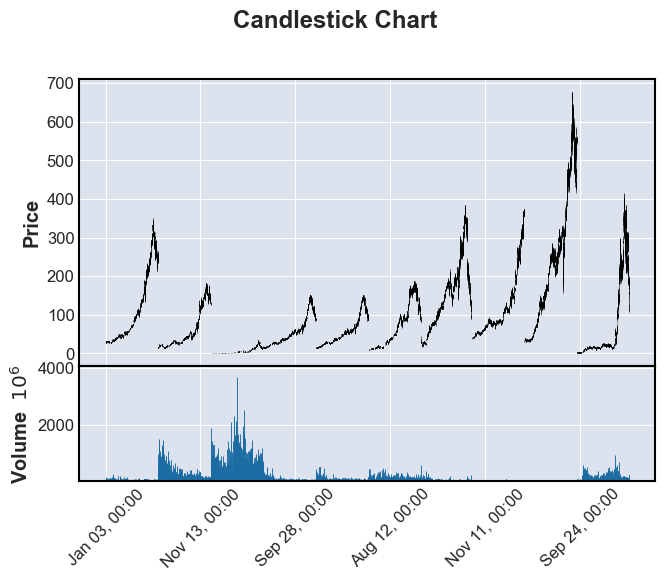

In [4]:
import pandas as pd
import mplfinance as mpf

# Example: Assuming all_stock_data is a DataFrame with Date as a column
# Convert 'Date' column to datetime and set it as index
all_stock_data['Date'] = pd.to_datetime(all_stock_data['Date'])
all_stock_data.set_index('Date', inplace=True)

# Plot candlestick chart using mplfinance
mpf.plot(all_stock_data, type='candle', volume=True, title='Candlestick Chart', ylabel='Price')


In [27]:
new_stock_data.head()

Symbol       Date     Open     High      Low    Close  Adj Close     Volume  \
0   NVDA 2012-01-03  0.35750  0.36000  0.35025  0.35100   0.321947  468044000   
1   NVDA 2012-01-04  0.35125  0.35650  0.34800  0.35500   0.325615  347372000   
2   NVDA 2012-01-05  0.35325  0.36950  0.35175  0.36775   0.337310  563548000   
3   NVDA 2012-01-06  0.36750  0.36775  0.35925  0.36350   0.333412  533252000   
4   NVDA 2012-01-09  0.36375  0.37050  0.36100  0.36350   0.333412  508244000   

         Company Name     Location  
0  NVIDIA Corporation  Santa Clara  
1  NVIDIA Corporation  Santa Clara  
2  NVIDIA Corporation  Santa Clara  
3  NVIDIA Corporation  Santa Clara  
4  NVIDIA Corporation  Santa Clara

C:\Users\mohamad.illham\AppData\Local\Temp\ipykernel_15752\711597989.py:32: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_returns = data['Daily Return'].resample('Y').sum()
C:\Users\mohamad.illham\AppData\Local\Temp\ipykernel_15752\711597989.py:32: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_returns = data['Daily Return'].resample('Y').sum()
C:\Users\mohamad.illham\AppData\Local\Temp\ipykernel_15752\711597989.py:32: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_returns = data['Daily Return'].resample('Y').sum()
C:\Users\mohamad.illham\AppData\Local\Temp\ipykernel_15752\711597989.py:32: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_returns = data['Daily Return'].resample('Y').sum()
C:\Users\mohamad.illham\AppData\Local\Temp\ipykernel_15752\7

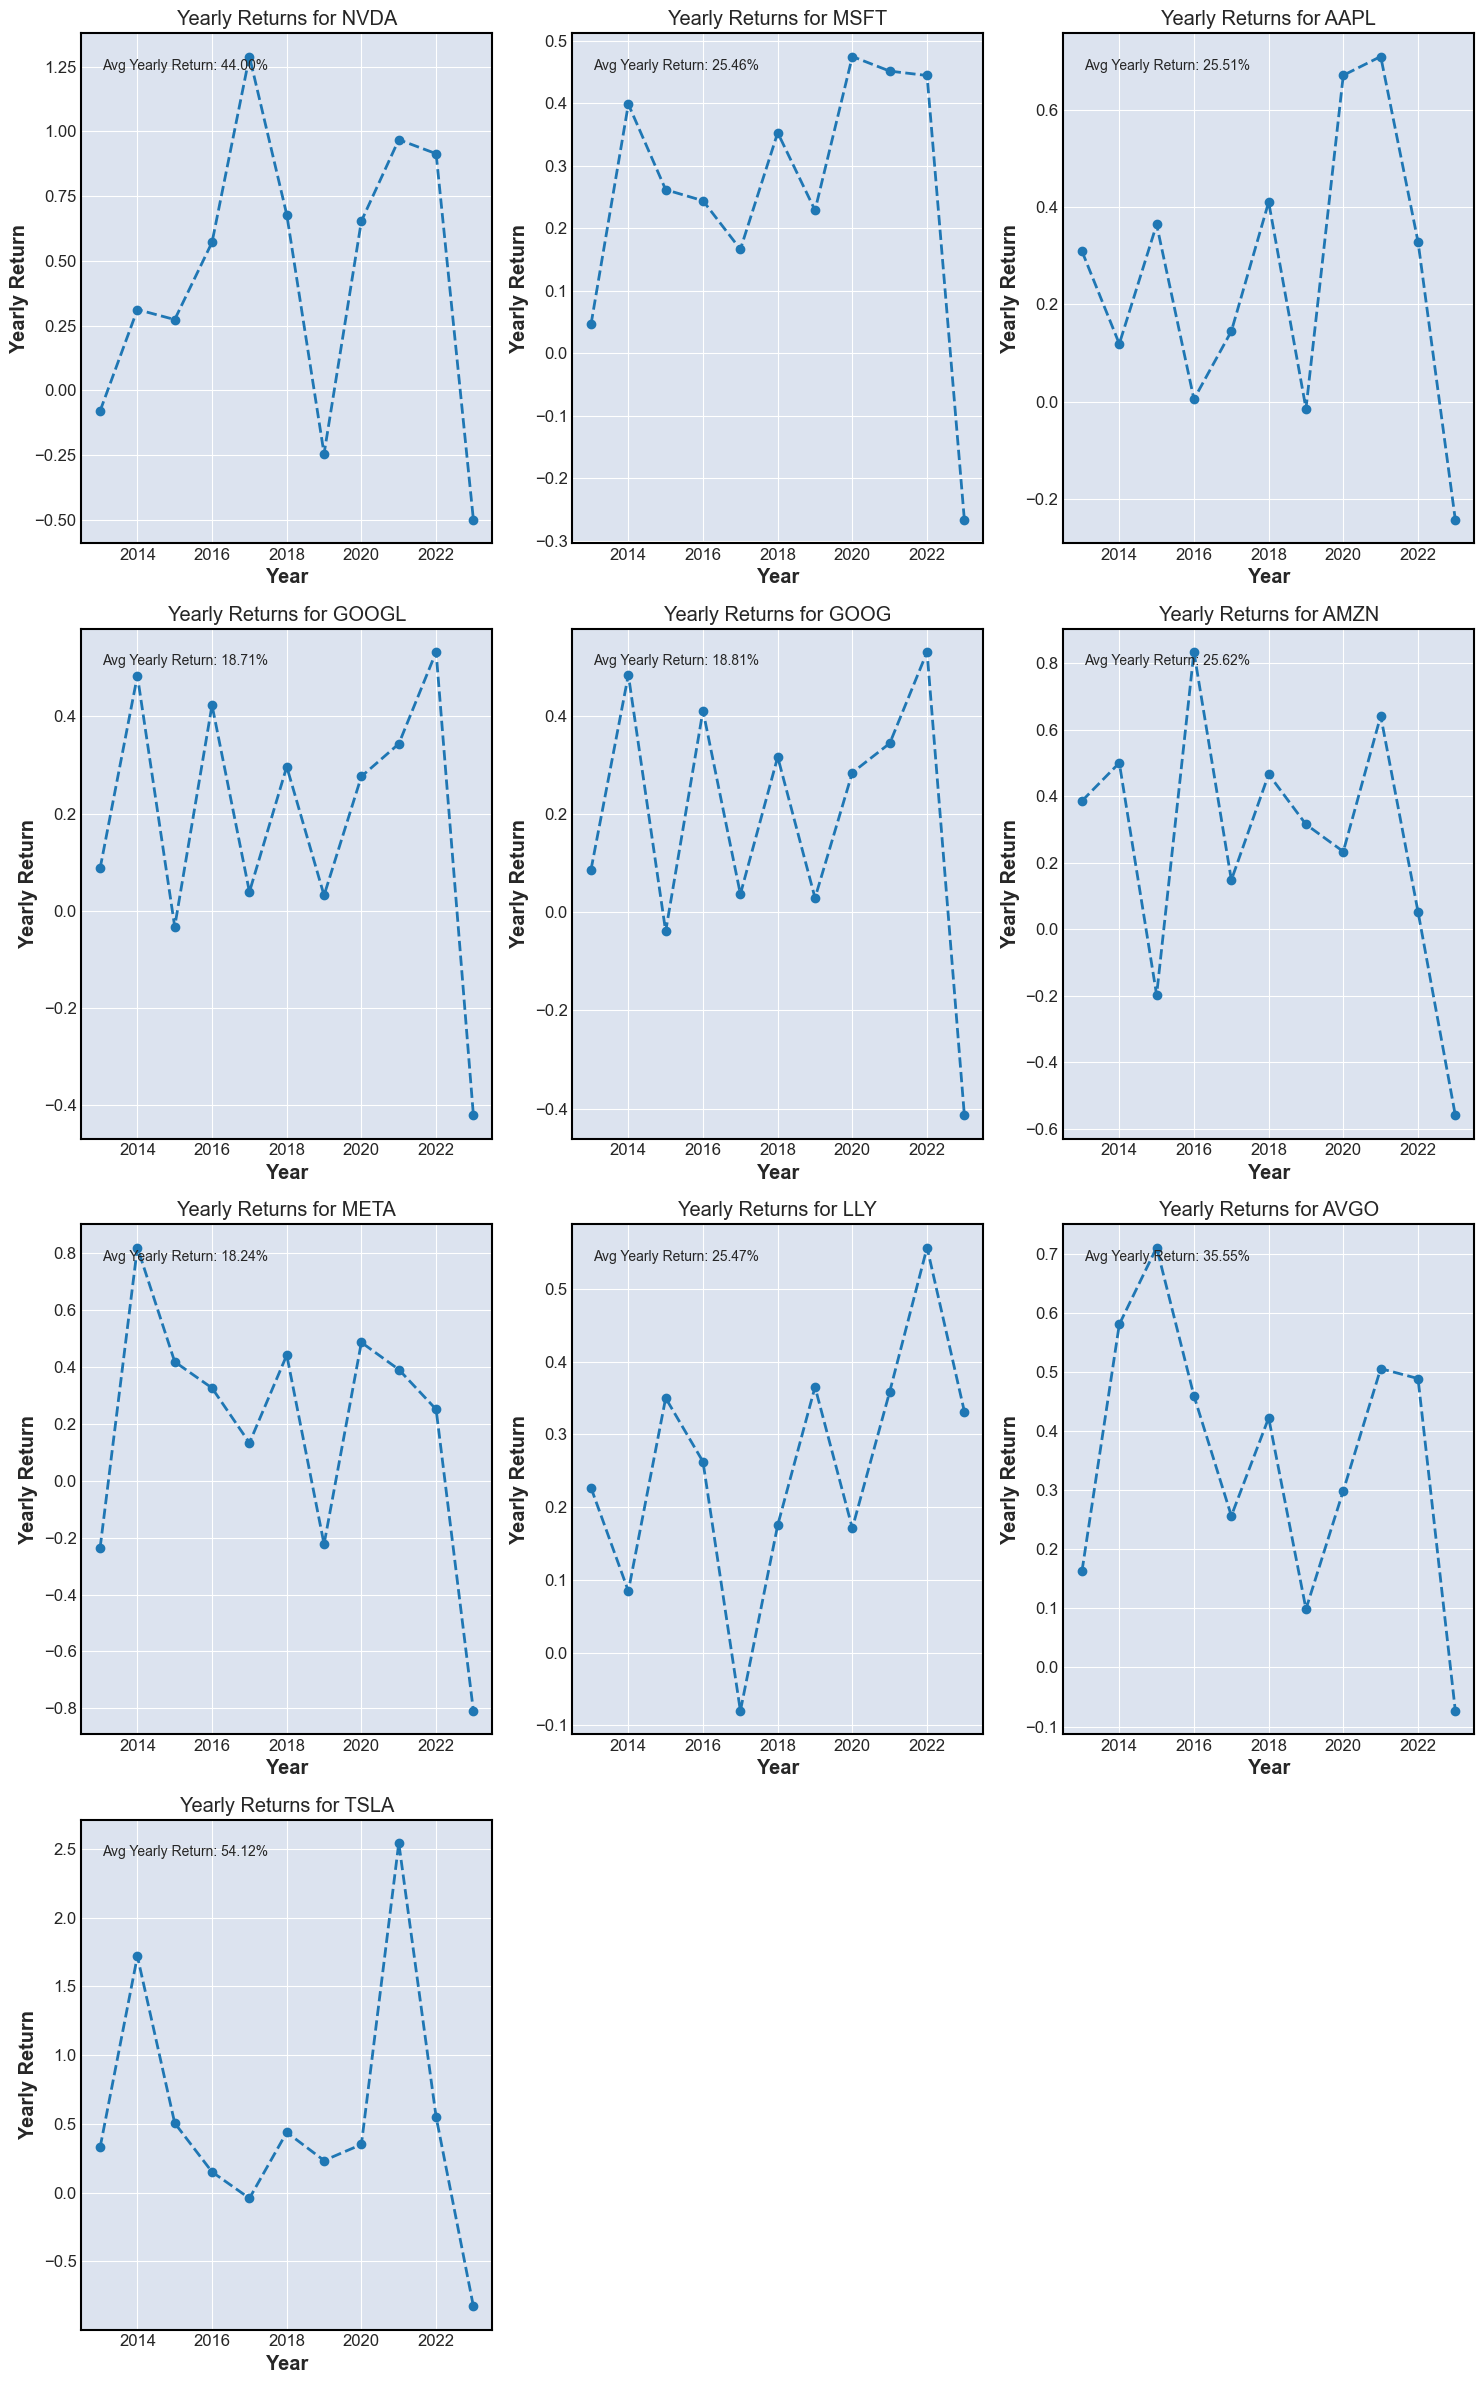

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming new_stock_data is your DataFrame containing the stock data
# and df contains market capitalization information with 'Symbol' as a column

# Get unique symbols from new_stock_data
all_symbols = new_stock_data['Symbol'].unique()

# Calculate number of rows and columns for subplots
num_symbols = len(all_symbols)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_symbols + num_cols - 1) // num_cols  # Round up division for rows

# Calculate and plot yearly returns for each symbol
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 6 * num_rows))

for i, symbol in enumerate(all_symbols):
    row = i // num_cols
    col = i % num_cols
    
    data = new_stock_data[new_stock_data['Symbol'] == symbol].copy()
    
    # Ensure index is datetime
    data.set_index('Date', inplace=True)
    data.index = pd.to_datetime(data.index)
    
    # Calculate daily returns using percentage change
    data['Daily Return'] = data['Adj Close'].pct_change()
    
    # Calculate yearly returns by resampling to yearly frequency and summing daily returns
    yearly_returns = data['Daily Return'].resample('Y').sum()
    
    # Plot yearly returns
    axes[row, col].plot(yearly_returns.index, yearly_returns.values, linestyle='--', marker='o')
    axes[row, col].set_title(f'Yearly Returns for {symbol}')
    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel('Yearly Return')
    axes[row, col].grid(True)
    
    # Calculate and display average yearly return
    avg_yearly_return = yearly_returns.mean()
    axes[row, col].annotate(f'Avg Yearly Return: {avg_yearly_return:.2%}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, ha='left', va='top')

# Remove empty subplots
if num_symbols < num_rows * num_cols:
    for i in range(num_symbols, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

# Adjust layout and display plot
plt.tight_layout()
plt.show()


In [19]:
new_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27585 entries, 0 to 27584
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Symbol        27585 non-null  object        
 1   Date          27585 non-null  datetime64[ns]
 2   Open          27585 non-null  float64       
 3   High          27585 non-null  float64       
 4   Low           27585 non-null  float64       
 5   Close         27585 non-null  float64       
 6   Adj Close     27585 non-null  float64       
 7   Volume        27585 non-null  int64         
 8   Company Name  27585 non-null  object        
 9   Location      27585 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 2.1+ MB


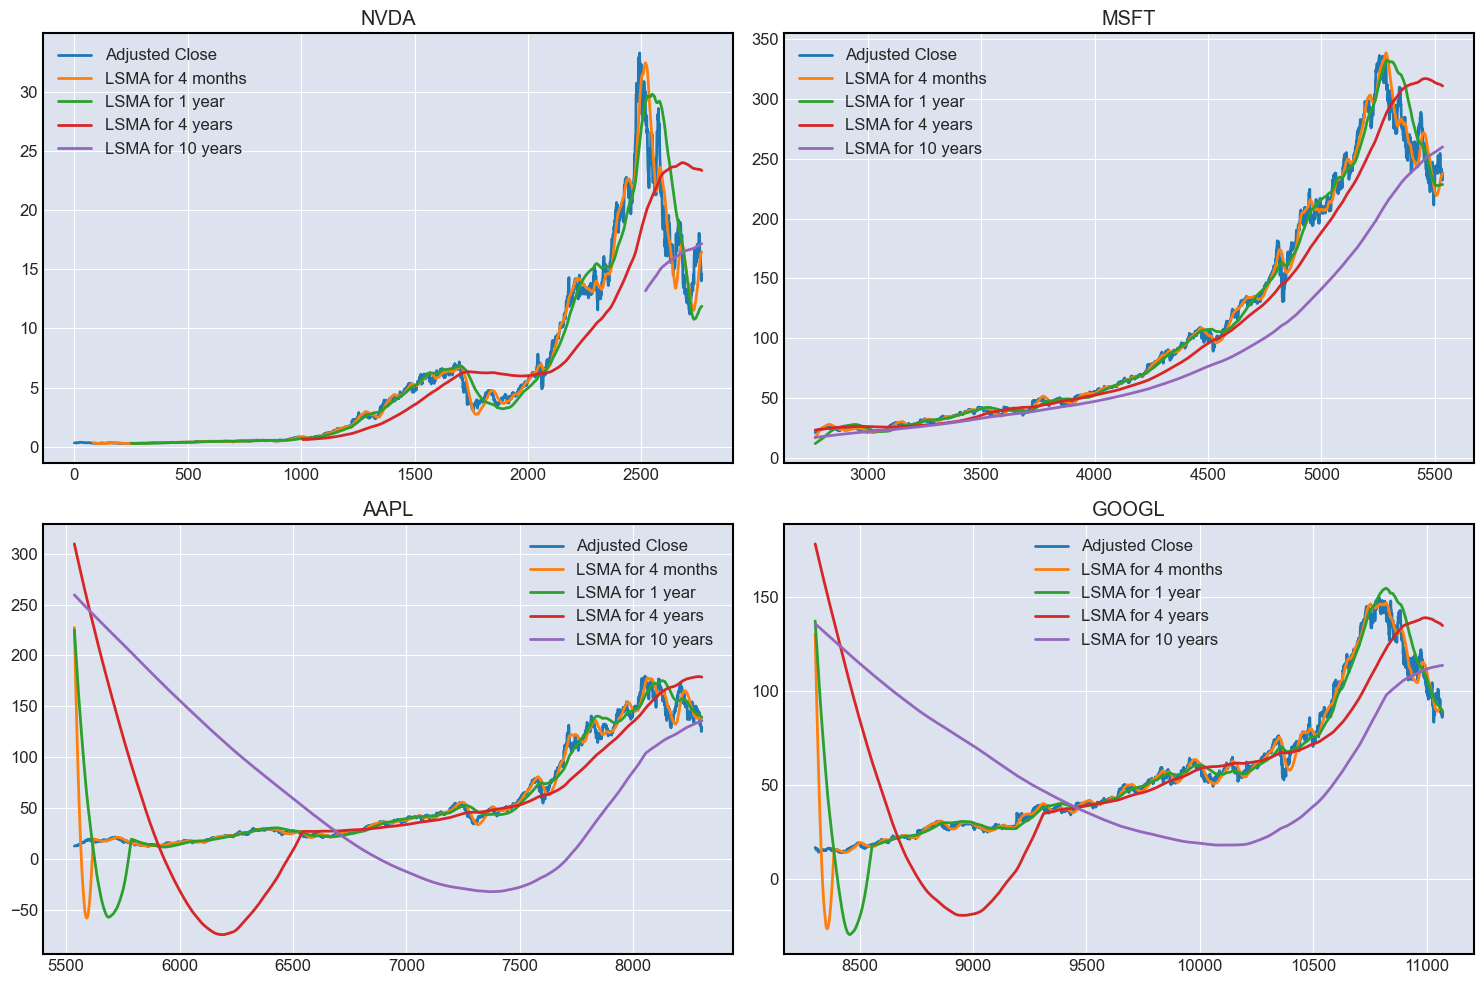

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming new_stock_data is your DataFrame containing the stock data
# Ensure 'Date' column is in datetime format


# Define the moving average periods in terms of number of days
ma_periods = [84, 252, 1008, 2520]  # 84 days (approx 4 months), 252 days (1 year), 1008 days (4 years), 2520 days (10 years)

# Calculate LSMA for each moving average period
for ma in ma_periods:
    column_name = f"LSMA for {ma} days"
    new_stock_data[column_name] = np.nan  # Initialize column with NaNs
    for i in range(ma-1, len(new_stock_data)):
        window_data = new_stock_data['Adj Close'].iloc[i-ma+1:i+1]  # Get data within the window
        x = np.arange(1, ma+1)
        slope, intercept = np.polyfit(x, window_data, 1)  # Fit a linear polynomial
        new_stock_data.at[new_stock_data.index[i], column_name] = slope * ma + intercept  # LSMA value for current date
       

# Map original column names to readable labels for legend
legend_mapping = {
    'Adj Close': 'Adjusted Close',
    f'LSMA for 84 days': 'LSMA for 4 months',
    f'LSMA for 252 days': 'LSMA for 1 year',
    f'LSMA for 1008 days': 'LSMA for 4 years',
    f'LSMA for 2520 days': 'LSMA for 10 years'
}

# Plot the data
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Assuming you want to plot the first 4 symbols in new_stock_data
symbols_to_plot = new_stock_data['Symbol'].unique()[:4]

for i, symbol in enumerate(symbols_to_plot, 1):
    if i > 4:  # Stop if there are more than 4 symbols
        break
    data = new_stock_data[new_stock_data['Symbol'] == symbol]
    row = (i - 1) // 2
    col = (i - 1) % 2
    
    # Rename columns for legend
    renamed_columns = [legend_mapping.get(col, col) for col in data.columns]
    data.columns = renamed_columns
    
    data[['Adjusted Close', 'LSMA for 4 months', 'LSMA for 1 year', 'LSMA for 4 years', 'LSMA for 10 years']].plot(ax=axes[row, col])
    axes[row, col].set_title(symbol)
    axes[row, col].legend()

fig.tight_layout()
plt.show()


In [23]:
new_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27585 entries, 0 to 27584
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Symbol              27585 non-null  object        
 1   Date                27585 non-null  datetime64[ns]
 2   Open                27585 non-null  float64       
 3   High                27585 non-null  float64       
 4   Low                 27585 non-null  float64       
 5   Close               27585 non-null  float64       
 6   Adj Close           27585 non-null  float64       
 7   Volume              27585 non-null  int64         
 8   Company Name        27585 non-null  object        
 9   Location            27585 non-null  object        
 10  LSMA for 84 days    27502 non-null  float64       
 11  LSMA for 252 days   27334 non-null  float64       
 12  LSMA for 1008 days  26578 non-null  float64       
 13  LSMA for 2520 days  25066 non-null  float64   

C:\Users\mohamad.illham\AppData\Local\Temp\ipykernel_14396\1134195512.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Daily Return'] = data['Adj Close'].pct_change()
C:\Users\mohamad.illham\AppData\Local\Temp\ipykernel_14396\1134195512.py:14: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_returns = data['Daily Return'].resample('Y').sum()
C:\Users\mohamad.illham\AppData\Local\Temp\ipykernel_14396\1134195512.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

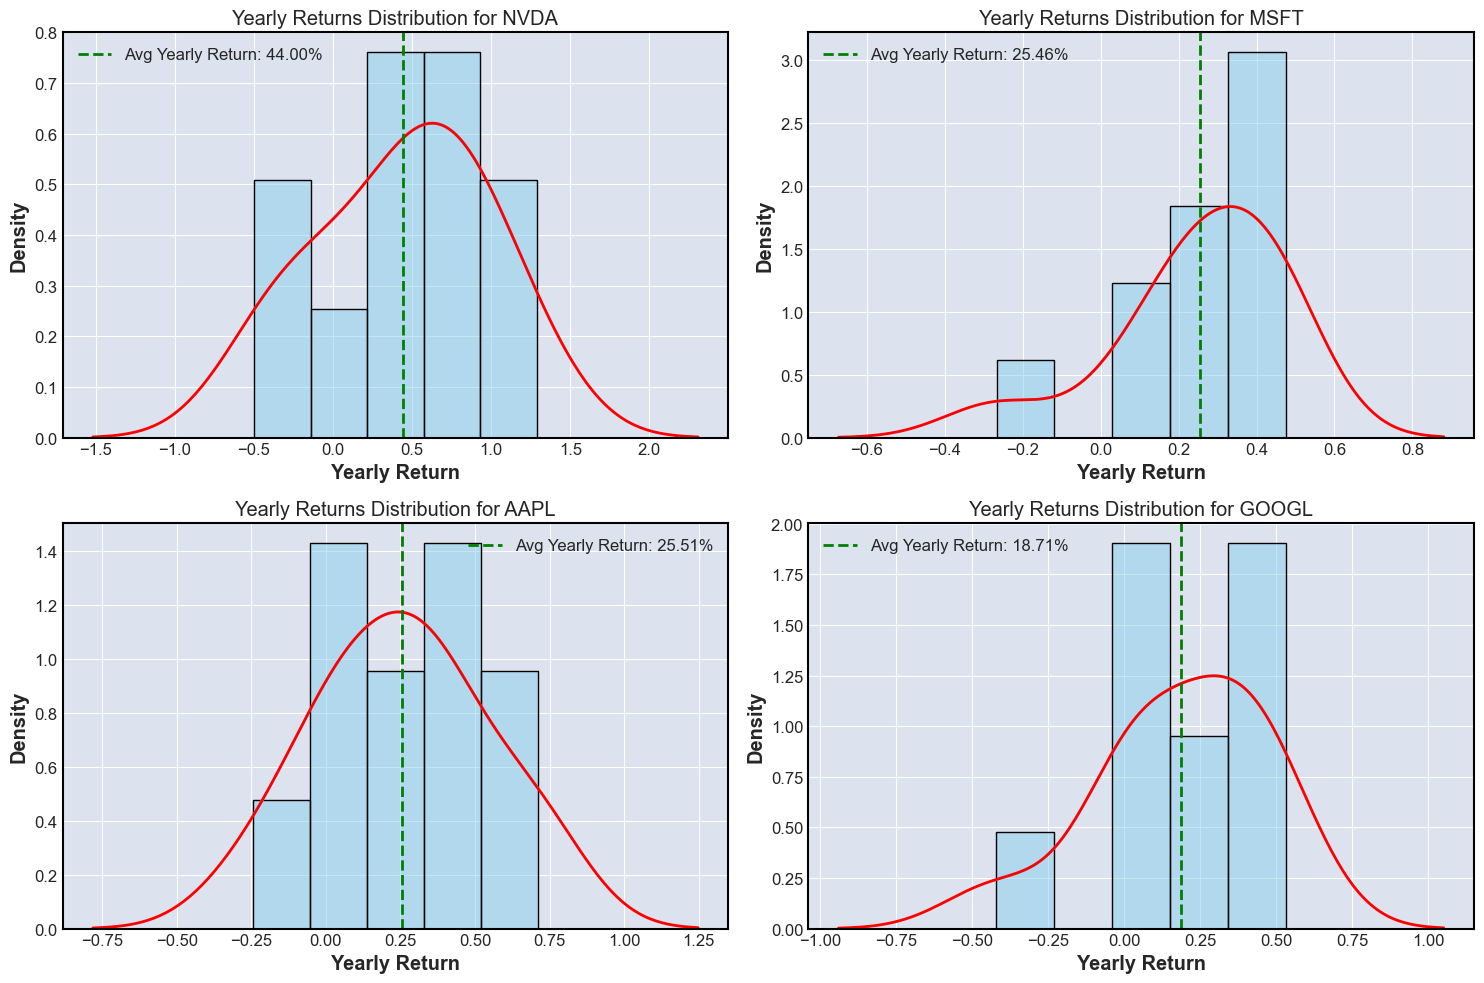

In [46]:
# Select top 4 companies based on market capitalization
top_symbols = df['Symbol'][:4]

# Create subplots for combined chart
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, symbol in enumerate(top_symbols):
    data = all_stock_data[all_stock_data['Symbol'] == symbol]
    
    # Calculate daily returns using percentage change
    data['Daily Return'] = data['Adj Close'].pct_change()
    
    # Calculate yearly returns by resampling to yearly frequency and summing daily returns
    yearly_returns = data['Daily Return'].resample('Y').sum()
    
    # Plot bar chart for yearly returns
    sns.histplot(yearly_returns, ax=axes[i//2, i%2], kde=True, stat='density', element='bars', color='skyblue')
    
    # Overlay KDE plot on the bar chart
    sns.kdeplot(yearly_returns, ax=axes[i//2, i%2], color='red', linestyle='-', linewidth=2)
    
    # Plot line chart for average yearly return
    avg_yearly_return = yearly_returns.mean()
    axes[i//2, i%2].axvline(x=avg_yearly_return, color='green', linestyle='--', label=f'Avg Yearly Return: {avg_yearly_return:.2%}')
    
    axes[i//2, i%2].set_title(f'Yearly Returns Distribution for {symbol}')
    axes[i//2, i%2].set_xlabel('Yearly Return')
    axes[i//2, i%2].set_ylabel('Density')
    axes[i//2, i%2].legend()

plt.tight_layout()
plt.show()


C:\Users\mohamad.illham\AppData\Local\Temp\ipykernel_15752\3661140462.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Daily Return'] = data['Adj Close'].pct_change()
C:\Users\mohamad.illham\AppData\Local\Temp\ipykernel_15752\3661140462.py:16: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_returns = data['Daily Return'].resample('Y').sum()
C:\Users\mohamad.illham\AppData\Local\Temp\ipykernel_15752\3661140462.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

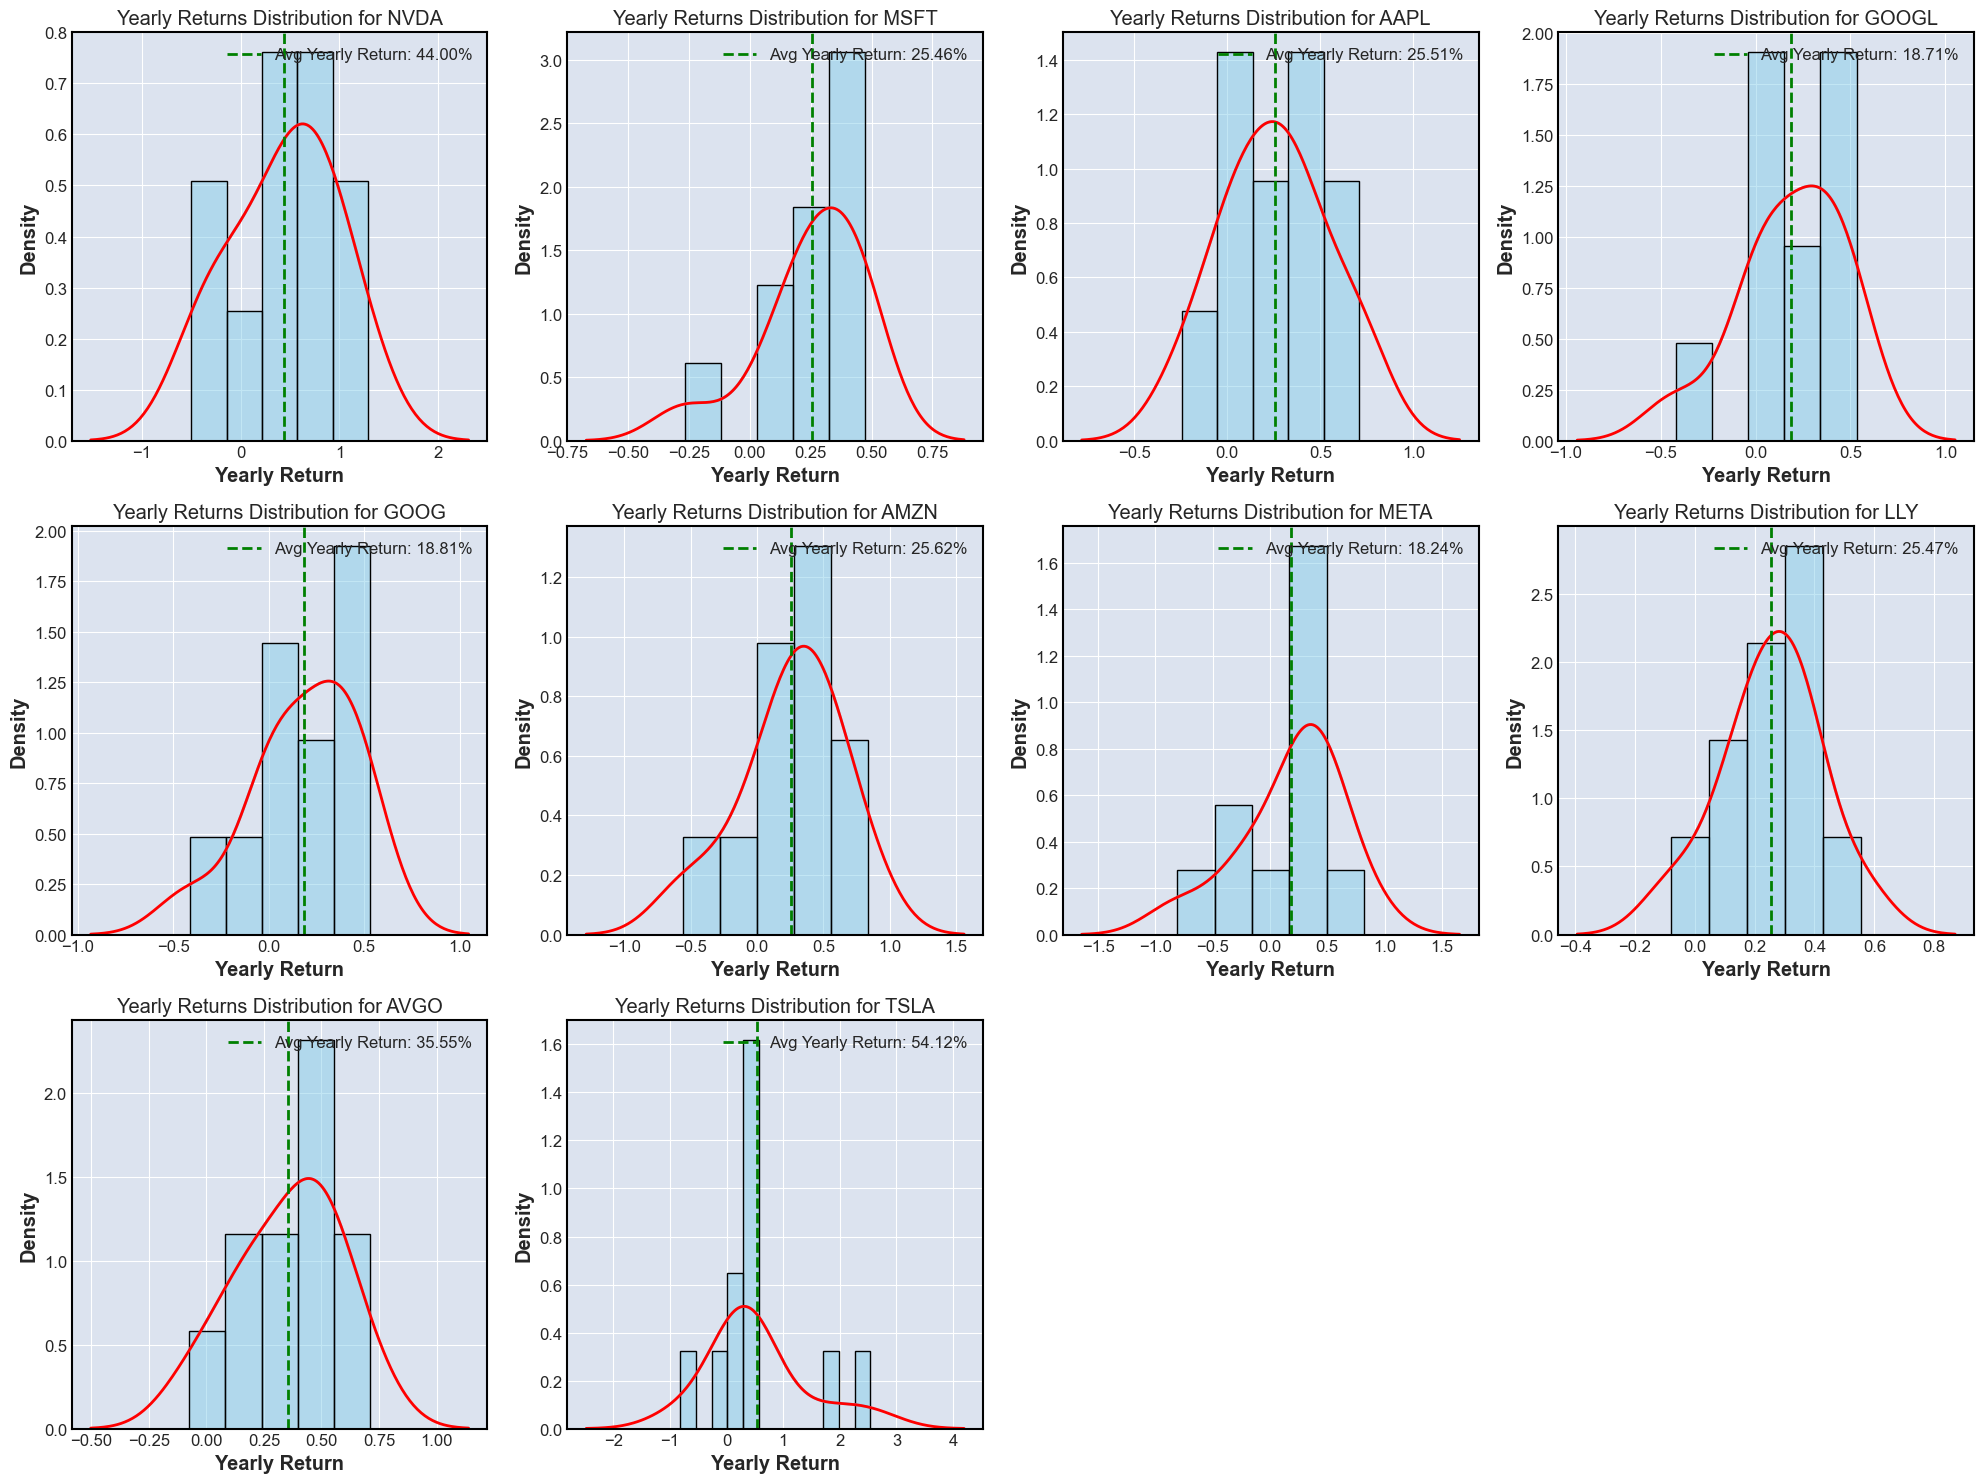

In [30]:
import seaborn as sns  # Ensure seaborn is imported for the plotting functions

# Select top 10 companies based on market capitalization for a 3x4 grid
top_symbols = df['Symbol'][:10].tolist()  # Convert to list to ensure we have exactly 10 elements

# Create subplots for combined chart
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

for i, symbol in enumerate(top_symbols):
    data = all_stock_data[all_stock_data['Symbol'] == symbol]
    
    # Calculate daily returns using percentage change
    data['Daily Return'] = data['Adj Close'].pct_change()
    
    # Calculate yearly returns by resampling to yearly frequency and summing daily returns
    yearly_returns = data['Daily Return'].resample('Y').sum()
    
    # Plot bar chart for yearly returns
    sns.histplot(yearly_returns, ax=axes[i//4, i%4], kde=True, stat='density', element='bars', color='skyblue')
    
    # Overlay KDE plot on the bar chart
    sns.kdeplot(yearly_returns, ax=axes[i//4, i%4], color='red', linestyle='-', linewidth=2)
    
    # Plot line chart for average yearly return
    avg_yearly_return = yearly_returns.mean()
    axes[i//4, i%4].axvline(x=avg_yearly_return, color='green', linestyle='--', label=f'Avg Yearly Return: {avg_yearly_return:.2%}')
    
    axes[i//4, i%4].set_title(f'Yearly Returns Distribution for {symbol}')
    axes[i//4, i%4].set_xlabel('Yearly Return')
    axes[i//4, i%4].set_ylabel('Density')
    axes[i//4, i%4].legend()

# Remove any unused subplots in case there are fewer than 10 symbols
for j in range(len(top_symbols), 12):
    axes[j//4, j%4].axis('off')

plt.tight_layout()
plt.show()


In [31]:
new_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27585 entries, 0 to 27584
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Symbol              27585 non-null  object        
 1   Date                27585 non-null  datetime64[ns]
 2   Open                27585 non-null  float64       
 3   High                27585 non-null  float64       
 4   Low                 27585 non-null  float64       
 5   Close               27585 non-null  float64       
 6   Adj Close           27585 non-null  float64       
 7   Volume              27585 non-null  int64         
 8   Company Name        27585 non-null  object        
 9   Location            27585 non-null  object        
 10  LSMA for 84 days    27502 non-null  float64       
 11  LSMA for 252 days   27334 non-null  float64       
 12  LSMA for 1008 days  26578 non-null  float64       
 13  LSMA for 2520 days  25066 non-null  float64   

In [34]:
# Extracting 'Adj Close' column into a new DataFrame
adj_close_data = new_stock_data[['Symbol', 'Date', 'Adj Close']].copy()

# Displaying summary information
print(adj_close_data.info())
print(adj_close_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27585 entries, 0 to 27584
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Symbol     27585 non-null  object        
 1   Date       27585 non-null  datetime64[ns]
 2   Adj Close  27585 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 646.7+ KB
None
                                Date     Adj Close
count                          27585  27585.000000
mean   2017-07-10 00:04:26.231647488     87.155829
min              2012-01-03 00:00:00      0.260951
25%              2014-10-14 00:00:00     22.042000
50%              2017-07-11 00:00:00     50.034576
75%              2020-04-07 00:00:00    122.435669
max              2022-12-30 00:00:00    636.024109
std                              NaN     96.758490


In [37]:
tech_rets = adj_close_data.pct_change()
tech_rets.head()

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [38]:
# Assuming adj_close_data is your DataFrame containing 'Adj Close' prices
adj_close_pct_change = adj_close_data['Adj Close'].pct_change()

# Displaying the first few rows to show the percentage change
print(adj_close_pct_change.head())


0         NaN
1    0.011396
2    0.035915
3   -0.011557
4    0.000000
Name: Adj Close, dtype: float64


In [49]:
# Create a new DataFrame with only 'Adj Close' column
adj_close_df = new_stock_data.pivot_table(index='Date', columns='Symbol', values='Adj Close')
adj_close_df.head()

Symbol           AAPL    AMZN       AVGO       GOOG      GOOGL        LLY  \
Date                                                                        
2012-01-03  12.433822  8.9515  21.081669  16.554291  16.632812  30.933786   
2012-01-04  12.500646  8.8755  20.717569  16.625692  16.704554  30.127148   
2012-01-05  12.639429  8.8805  20.746683  16.395069  16.472836  29.823742   
2012-01-06  12.771562  9.1305  20.615608  16.171415  16.248119  29.512907   
2012-01-09  12.751299  8.9280  22.006491  15.485767  15.559219  29.461115   

Symbol      META       MSFT      NVDA      TSLA  
Date                                             
2012-01-03   NaN  21.238756  0.321947  1.872000  
2012-01-04   NaN  21.738585  0.325616  1.847333  
2012-01-05   NaN  21.960730  0.337310  1.808000  
2012-01-06   NaN  22.301880  0.333412  1.794000  
2012-01-09   NaN  22.008329  0.333412  1.816667

In [50]:
tech_rets = adj_close_df.pct_change()
tech_rets.head()

Symbol          AAPL      AMZN      AVGO      GOOG     GOOGL       LLY  META  \
Date                                                                           
2012-01-03       NaN       NaN       NaN       NaN       NaN       NaN   NaN   
2012-01-04  0.005374 -0.008490 -0.017271  0.004313  0.004313 -0.026076   NaN   
2012-01-05  0.011102  0.000563  0.001405 -0.013871 -0.013872 -0.010071   NaN   
2012-01-06  0.010454  0.028152 -0.006318 -0.013642 -0.013642 -0.010422   NaN   
2012-01-09 -0.001587 -0.022178  0.067467 -0.042399 -0.042399 -0.001755   NaN   

Symbol          MSFT      NVDA      TSLA  
Date                                      
2012-01-03       NaN       NaN       NaN  
2012-01-04  0.023534  0.011396 -0.013177  
2012-01-05  0.010219  0.035915 -0.021292  
2012-01-06  0.015535 -0.011557 -0.007743  
2012-01-09 -0.013163  0.000000  0.012635

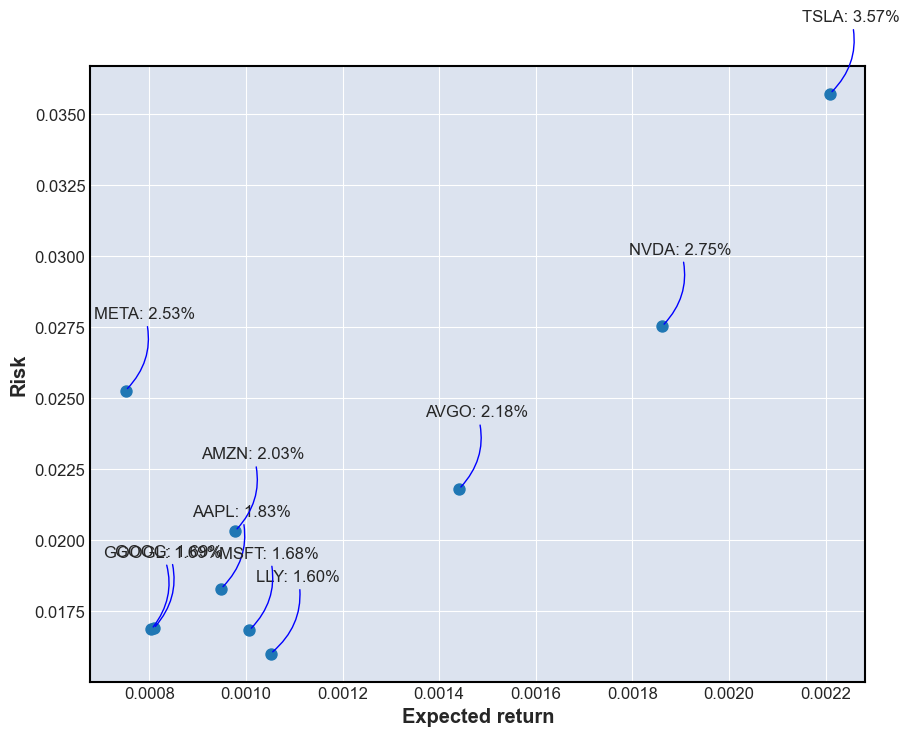

In [52]:
plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, y in zip(rets.columns, rets.std()):
    plt.annotate(f'{label}: {y:.2%}', xy=(rets.mean()[label], y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


In [53]:
import datetime  # Import the datetime module

# Define the ticker symbol
tickerSymbol = 'AAPL'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
# Use datetime.now() after importing datetime
df = tickerData.history(period='1d', start='2012-1-1', end=datetime.datetime.now())

# Show the data
print(df)


                                 Open        High         Low       Close  \
Date                                                                        
2012-01-03 00:00:00-05:00   12.378494   12.472224   12.366399   12.433825   
2012-01-04 00:00:00-05:00   12.396633   12.538137   12.374864   12.500644   
2012-01-05 00:00:00-05:00   12.546301   12.655148   12.477362   12.639426   
2012-01-06 00:00:00-05:00   12.692039   12.782141   12.675409   12.771559   
2012-01-09 00:00:00-05:00   12.865288   12.933318   12.739809   12.751299   
...                               ...         ...         ...         ...   
2024-06-12 00:00:00-04:00  207.369995  220.199997  206.899994  213.070007   
2024-06-13 00:00:00-04:00  214.740005  216.750000  211.600006  214.240005   
2024-06-14 00:00:00-04:00  213.850006  215.169998  211.300003  212.490005   
2024-06-17 00:00:00-04:00  213.369995  218.949997  212.720001  216.669998   
2024-06-18 00:00:00-04:00  217.589996  218.630005  213.000000  214.289993   

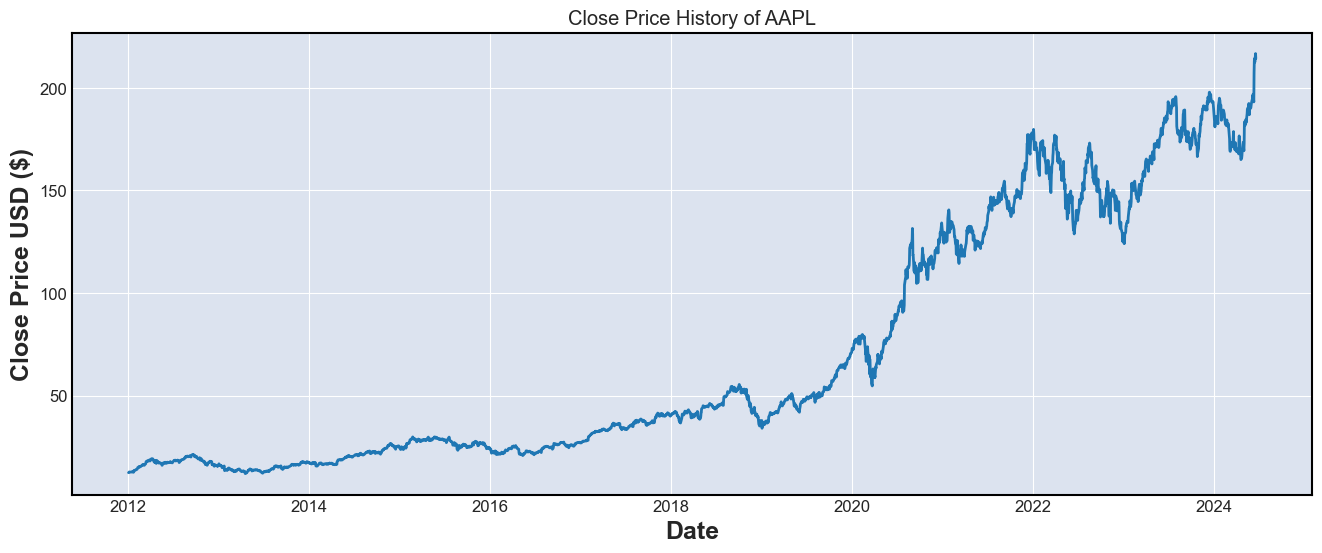

In [57]:
plt.figure(figsize=(16,6))
plt.title('Close Price History of AAPL')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [58]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2979

In [59]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00220622],
       [0.00253267],
       [0.00321069],
       ...,
       [0.97957869],
       [1.        ],
       [0.98837251]])

In [60]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00220622, 0.00253267, 0.00321069, 0.00385622, 0.00375724,
       0.00398029, 0.00387838, 0.00370702, 0.00347364, 0.00419596,
       0.0048474 , 0.0046465 , 0.00354601, 0.00459627, 0.00356226,
       0.00743981, 0.00713995, 0.00753139, 0.0083778 , 0.00889036,
       0.00884756, 0.00868949, 0.00936306, 0.00999678, 0.01071468,
       0.01187426, 0.01431007, 0.01434703, 0.01570308, 0.01671637,
       0.01497483, 0.01564546, 0.01563213, 0.01751257, 0.01724523,
       0.01774006, 0.01862929, 0.01912415, 0.02054964, 0.02158805,
       0.02188794, 0.02199281, 0.02021725, 0.01978888, 0.01985239,
       0.02152157, 0.02199131, 0.02300024, 0.02537846, 0.02855142,
       0.02795757, 0.02795909, 0.03025308, 0.03097101, 0.03045988,
       0.02999313, 0.02950712, 0.03112168, 0.03222954, 0.03269337])]
[0.03154706130935907]

[array([0.00220622, 0.00253267, 0.00321069, 0.00385622, 0.00375724,
       0.00398029, 0.00387838, 0.00370702, 0.00347364, 0.00419596,
       0.0048474 , 0.0046465 , 0.00

In [61]:
# Printing shapes
print(x_train.shape)  # Example output: (number_of_samples, 60, 1)
print(y_train.shape)  # Example output: (number_of_samples,)

# Printing sample data
print("x_train samples:")
print(x_train[:2])  # Example output: first 2 sequences
print("\ny_train samples:")
print(y_train[:2])  # Example output: first 2 target values


(2919, 60, 1)
(2919,)
x_train samples:
[[[0.00220622]
  [0.00253267]
  [0.00321069]
  [0.00385622]
  [0.00375724]
  [0.00398029]
  [0.00387838]
  [0.00370702]
  [0.00347364]
  [0.00419596]
  [0.0048474 ]
  [0.0046465 ]
  [0.00354601]
  [0.00459627]
  [0.00356226]
  [0.00743981]
  [0.00713995]
  [0.00753139]
  [0.0083778 ]
  [0.00889036]
  [0.00884756]
  [0.00868949]
  [0.00936306]
  [0.00999678]
  [0.01071468]
  [0.01187426]
  [0.01431007]
  [0.01434703]
  [0.01570308]
  [0.01671637]
  [0.01497483]
  [0.01564546]
  [0.01563213]
  [0.01751257]
  [0.01724523]
  [0.01774006]
  [0.01862929]
  [0.01912415]
  [0.02054964]
  [0.02158805]
  [0.02188794]
  [0.02199281]
  [0.02021725]
  [0.01978888]
  [0.01985239]
  [0.02152157]
  [0.02199131]
  [0.02300024]
  [0.02537846]
  [0.02855142]
  [0.02795757]
  [0.02795909]
  [0.03025308]
  [0.03097101]
  [0.03045988]
  [0.02999313]
  [0.02950712]
  [0.03112168]
  [0.03222954]
  [0.03269337]]

 [[0.00253267]
  [0.00321069]
  [0.00385622]
  [0.00375724]

In [64]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

NameError: name 'model' is not defined

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [63]:
# Example: Classifying stock performance based on price changes
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Define target variable based on price changes
all_stock_data['PriceChange'] = all_stock_data['Close'].diff().shift(-1)  # Example: Next day price change
all_stock_data['Performance'] = np.where(all_stock_data['PriceChange'] > 0, 'Up', 'Down')

# Prepare features and target
X = all_stock_data[['Open', 'High', 'Low', 'Volume']]
y = all_stock_data['Performance']

# Label encoding for categorical target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train a random forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")


NameError: name 'train_test_split' is not defined

In [62]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

ImportError: Could not find the DLL(s) 'msvcp140_1.dll'. TensorFlow requires that these DLLs be installed in a directory that is named in your %PATH% environment variable. You may install these DLLs by downloading "Microsoft C++ Redistributable for Visual Studio 2015, 2017 and 2019" for your platform from this URL: https://support.microsoft.com/help/2977003/the-latest-supported-visual-c-downloads

In [65]:
from sklearn.model_selection import train_test_split

# Splitting data into training and testing sets
train_data = dataset[:training_data_len]
test_data = dataset[training_data_len:]


In [66]:
import numpy as np

# Function to create X and y datasets
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

# Create X and y datasets for training
time_step = 60  # Example: using the last 60 days' prices to predict the next day
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Ensure X has 2 dimensions for scikit-learn models
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))  # Reshape for scikit-learn
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))


In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [68]:
# Get predictions
predictions = model.predict(X_test)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')


Root Mean Squared Error (RMSE): 2.9786935897292595


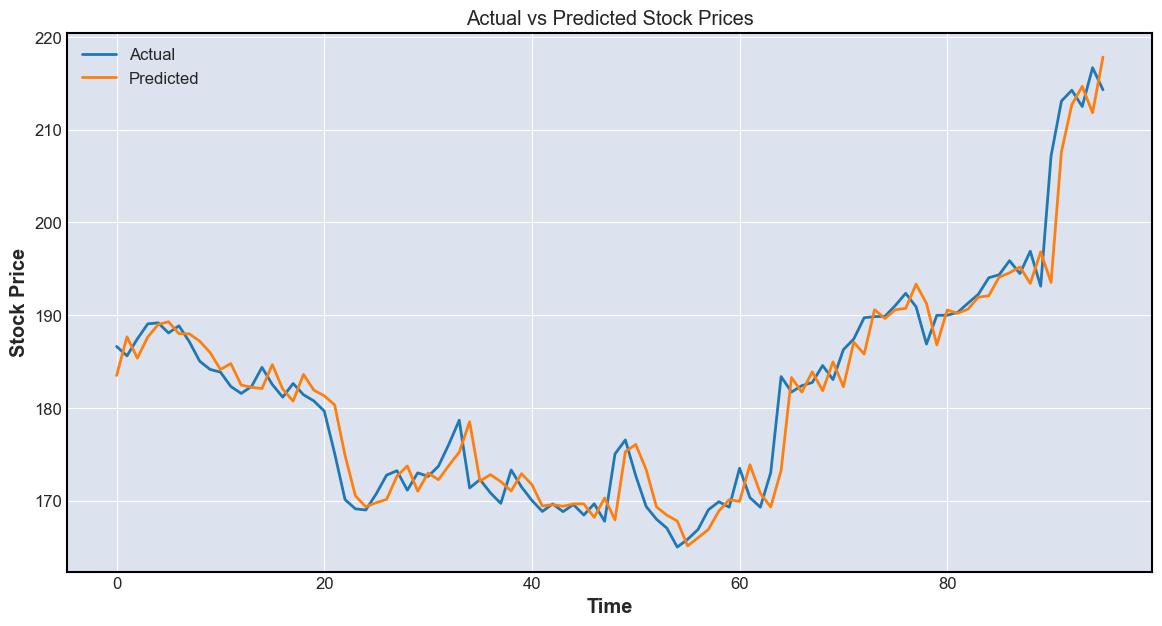

In [69]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Root Mean Squared Error (RMSE): 2.9786933772967616


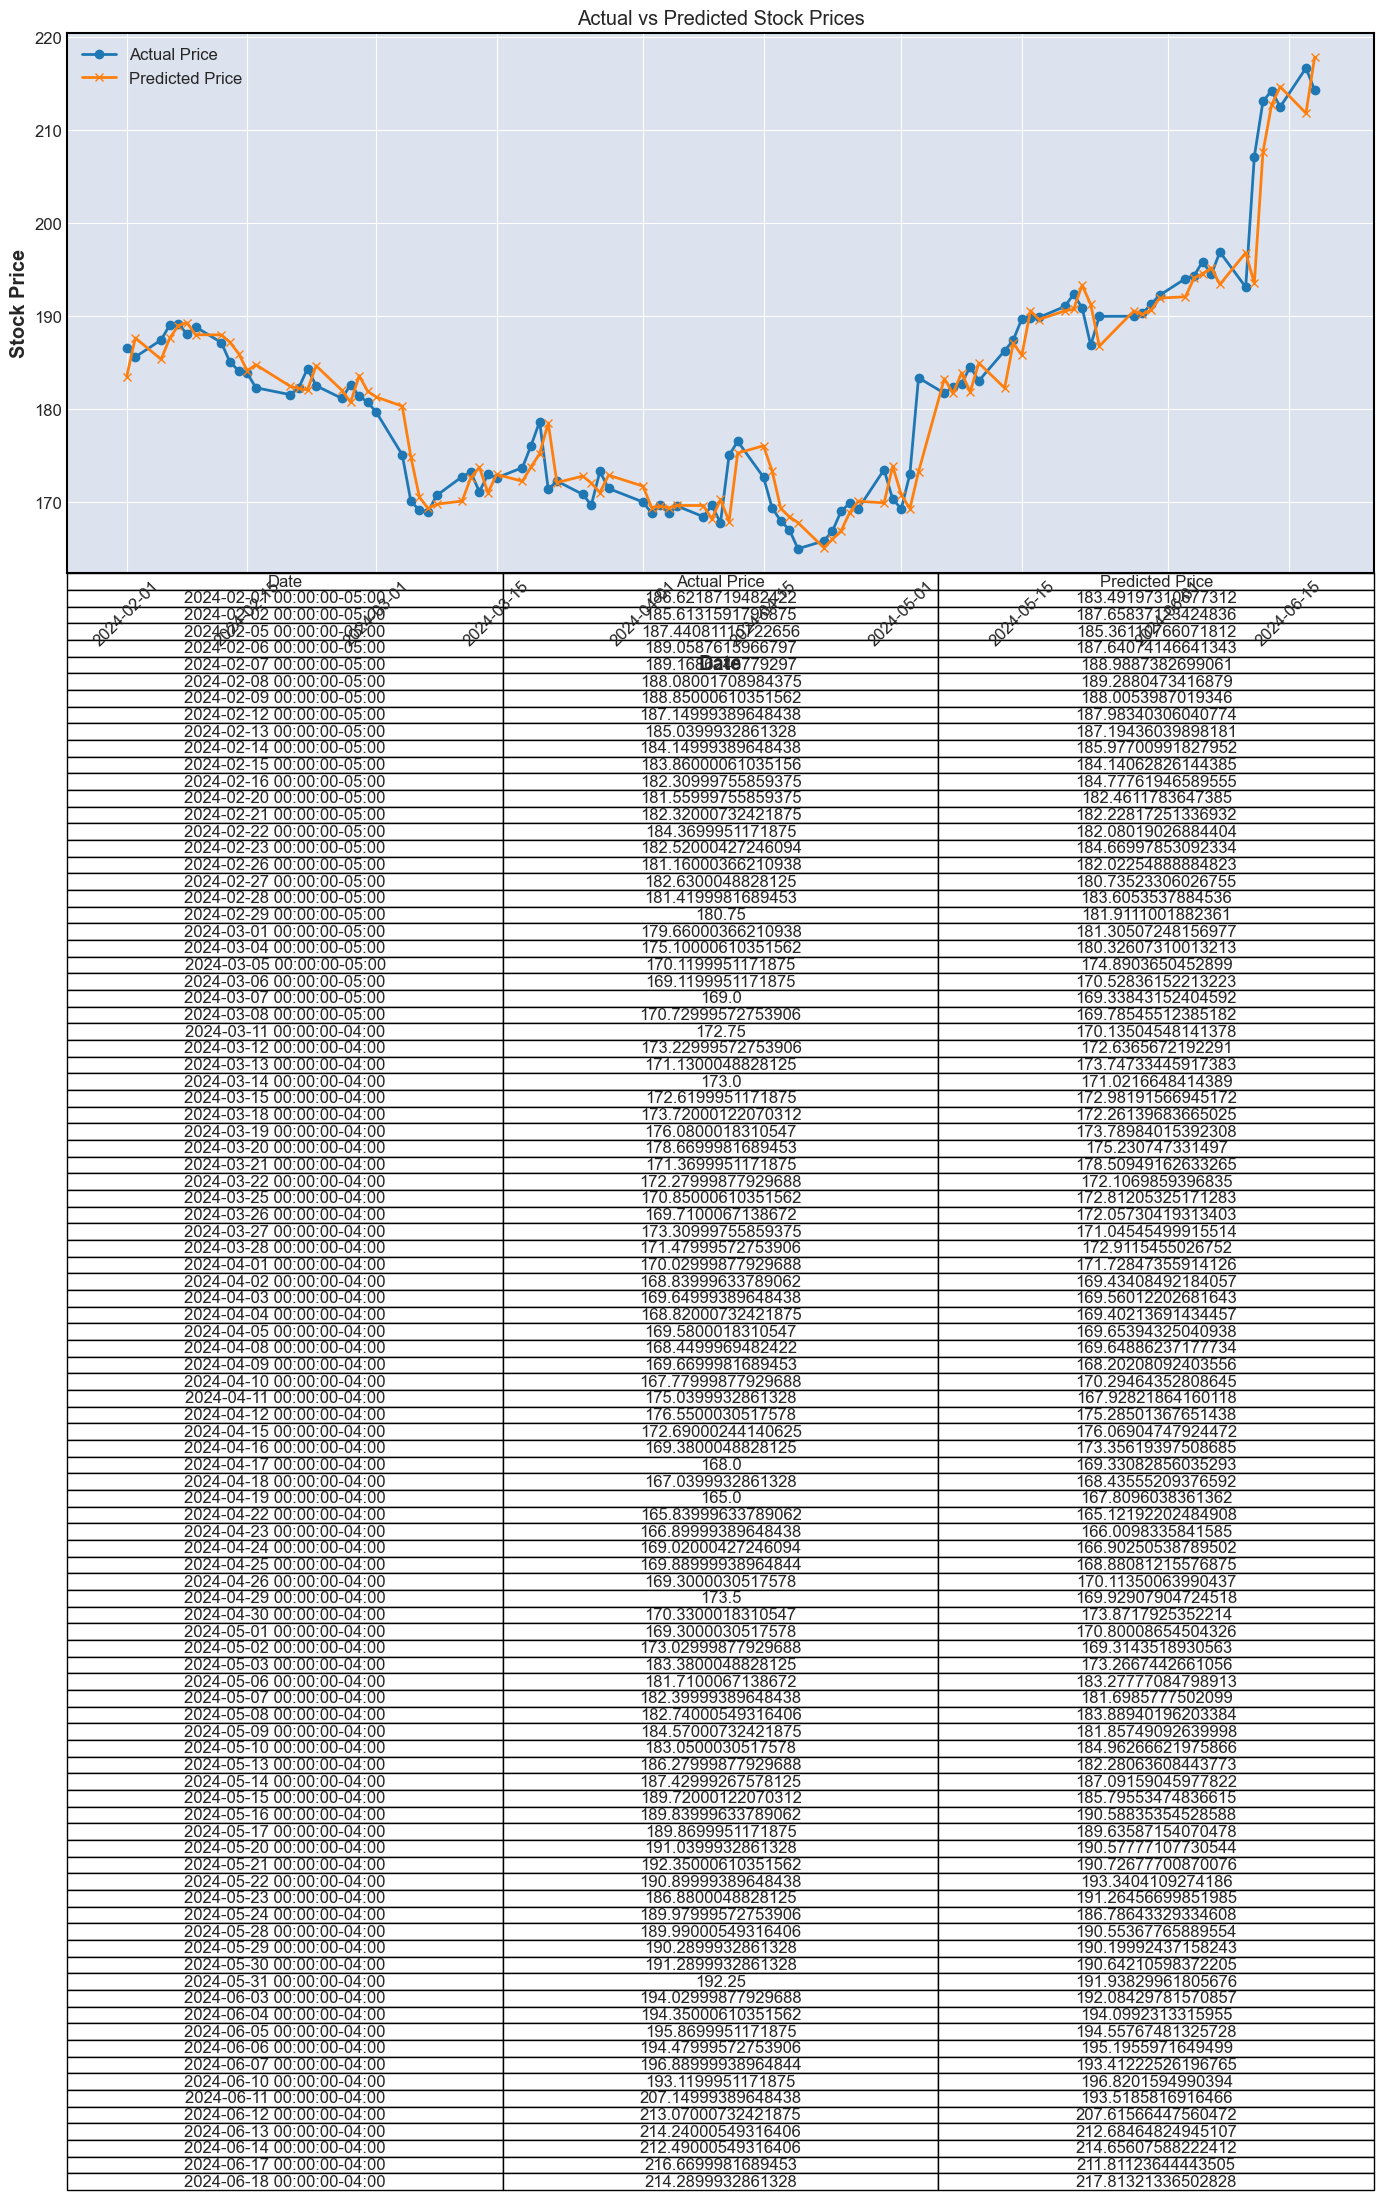

In [71]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the ticker symbol
tickerSymbol = 'AAPL'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
df = tickerData.history(period='1d', start='2012-1-1', end=datetime.datetime.now())

# Create a new dataframe with only the 'Close' column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .95))

# Function to create X and y datasets
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

# Create X and y datasets for training
time_step = 60  # Using the last 60 days' prices to predict the next day
X_train, y_train = create_dataset(dataset[:training_data_len], time_step)
X_test, y_test = create_dataset(dataset[training_data_len:], time_step)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Get predictions
predictions = model.predict(X_test)

# Create a DataFrame for actual and predicted prices
dates = df.index[training_data_len + time_step:].to_list()  # Dates for X_test
predicted_df = pd.DataFrame({'Date': dates, 'Actual Price': y_test, 'Predicted Price': predictions})

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plotting actual vs predicted
plt.figure(figsize=(14, 7))
plt.plot(dates, y_test, label='Actual Price', marker='o')
plt.plot(dates, predictions, label='Predicted Price', marker='x')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Display the table
plt.table(cellText=predicted_df.values, colLabels=predicted_df.columns, cellLoc='center', loc='bottom')

plt.show()


In [73]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the ticker symbol
tickerSymbol = 'AAPL'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
df = tickerData.history(period='1d', start='2012-1-1', end=datetime.datetime.now())

# Create a new dataframe with only the 'Close' column 
data = df.filter(['Close'])


data


Close
Date                                 
2012-01-03 00:00:00-05:00   12.433824
2012-01-04 00:00:00-05:00   12.500644
2012-01-05 00:00:00-05:00   12.639426
2012-01-06 00:00:00-05:00   12.771558
2012-01-09 00:00:00-05:00   12.751303
...                               ...
2024-06-12 00:00:00-04:00  213.070007
2024-06-13 00:00:00-04:00  214.240005
2024-06-14 00:00:00-04:00  212.490005
2024-06-17 00:00:00-04:00  216.669998
2024-06-18 00:00:00-04:00  214.289993

[3135 rows x 1 columns]

In [75]:
# Convert the dataframe to a numpy array
dataset = data.values

dataset

array([[ 12.43382359],
       [ 12.50064373],
       [ 12.63942623],
       ...,
       [212.49000549],
       [216.66999817],
       [214.28999329]])

In [77]:
# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .95))

training_data_len


2979

In [81]:
# Function to create X and y datasets
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)


In [82]:
# Create X and y datasets for training
time_step = 60  # Using the last 60 days' prices to predict the next day
X_train, y_train = create_dataset(dataset[:training_data_len], time_step)
X_test, y_test = create_dataset(dataset[training_data_len:], time_step)


In [85]:
#Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Get predictions
predictions = model.predict(X_test)

predictions

array([183.49196537, 187.65837735, 185.36109322, 187.64075066,
       188.98873282, 189.28804888, 188.00539519, 187.98341188,
       187.19434637, 185.97702189, 184.14062242, 184.77762087,
       182.46117841, 182.22817498, 182.08019282, 184.66998065,
       182.02254109, 180.73523822, 183.60534491, 181.91110669,
       181.30507304, 180.32607249, 174.89036865, 170.52836707,
       169.33842757, 169.78544329, 170.13504612, 172.63656688,
       173.74733198, 171.02167008, 172.98192042, 172.26139209,
       173.78984334, 175.23074197, 178.50949178, 172.1069788 ,
       172.81206637, 172.05730114, 171.04546483, 172.91154669,
       171.72846288, 169.43408831, 169.5601227 , 169.40213273,
       169.65394329, 169.64886404, 168.20208433, 170.29463909,
       167.92821669, 175.28501803, 176.06903458, 173.3562052 ,
       169.33082733, 168.43554793, 167.80961126, 165.12192194,
       166.00983331, 166.90250627, 168.88080969, 170.11349909,
       169.92907341, 173.87179491, 170.80009132, 169.31

In [99]:
# Create a DataFrame for actual and predicted prices
dates = df.index[training_data_len + time_step:].to_list()  # Dates for X_test
predicted_df = pd.DataFrame({'Date': dates, 'Actual Price': y_test, 'Predicted Price': predictions})


In [100]:
# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 2.9786937265616267


In [102]:
predicted_df.head()

Date  Actual Price  Predicted Price
0 2024-02-01 00:00:00-05:00    186.621872       183.491965
1 2024-02-02 00:00:00-05:00    185.613159       187.658377
2 2024-02-05 00:00:00-05:00    187.440811       185.361093
3 2024-02-06 00:00:00-05:00    189.058762       187.640751
4 2024-02-07 00:00:00-05:00    189.168625       188.988733

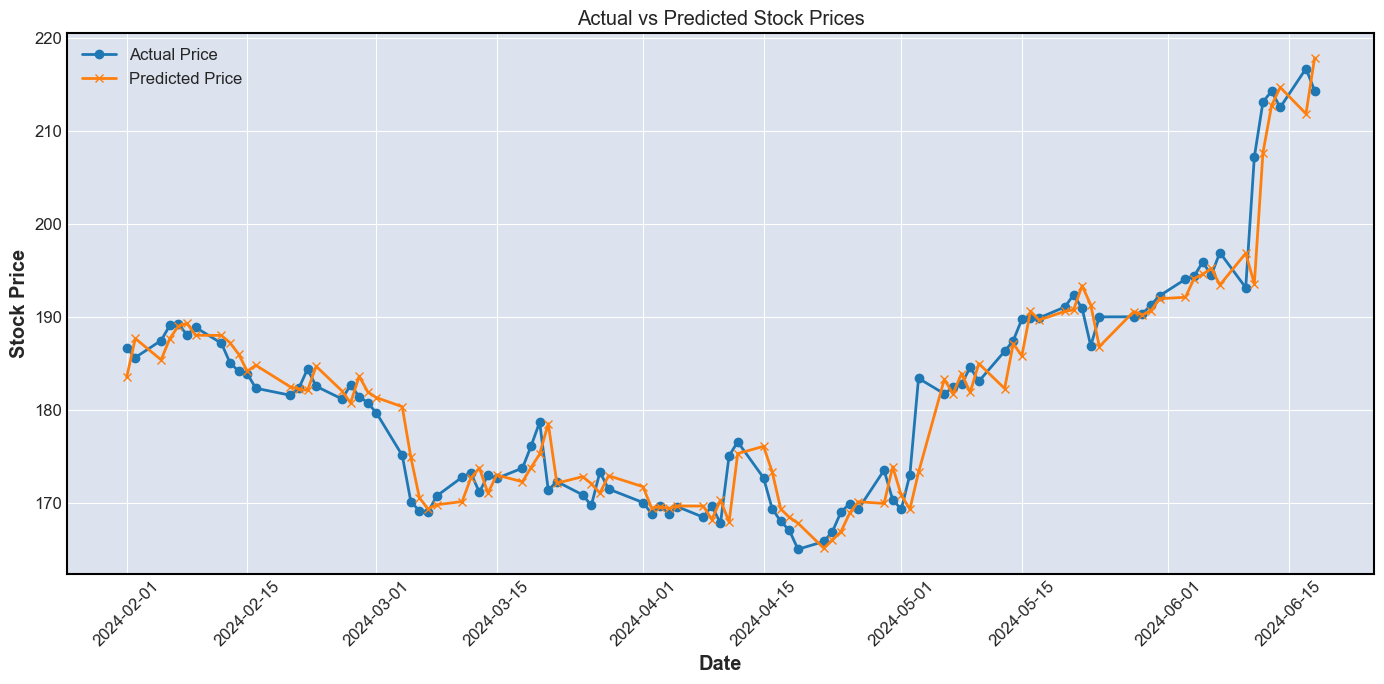

In [101]:
# Plotting actual vs predicted
plt.figure(figsize=(14, 7))
plt.plot(dates, y_test, label='Actual Price', marker='o')
plt.plot(dates, predictions, label='Predicted Price', marker='x')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

In [93]:
# Display the table
predicted_df.head()

Date  Actual Price  Predicted Price
0 2024-02-01 00:00:00-05:00    186.621872       183.491965
1 2024-02-02 00:00:00-05:00    185.613159       187.658377
2 2024-02-05 00:00:00-05:00    187.440811       185.361093
3 2024-02-06 00:00:00-05:00    189.058762       187.640751
4 2024-02-07 00:00:00-05:00    189.168625       188.988733

In [95]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import yfinance as yf

# Define the ticker symbol
tickerSymbol = 'AAPL'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
df = tickerData.history(period='1d', start='2012-1-1', end=datetime.datetime.now())

# Create a new dataframe with only the 'Close' column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .95))

# Function to create X and y datasets
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

# Create X and y datasets for training
time_step = 60  # Using the last 60 days' prices to predict the next day
X_train, y_train = create_dataset(dataset[:training_data_len], time_step)
X_test, y_test = create_dataset(dataset[training_data_len:], time_step)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()


Forecasted Prices:
          Date  Forecasted Price
0   2024-06-19        213.285090
1   2024-06-20        213.636701
2   2024-06-21        213.305656
3   2024-06-24        213.904916
4   2024-06-25        213.650802
5   2024-06-26        213.998596
6   2024-06-27        214.665643
7   2024-06-28        213.787845
8   2024-07-01        212.817698
9   2024-07-02        212.514223
10  2024-07-03        212.765869
11  2024-07-04        211.592462
12  2024-07-05        212.293646
13  2024-07-08        213.179738
14  2024-07-09        213.132005
15  2024-07-10        213.283940
16  2024-07-11        213.038603
17  2024-07-12        213.137008
18  2024-07-15        212.743906
19  2024-07-16        212.435674
20  2024-07-17        211.520742
21  2024-07-18        212.618046
22  2024-07-19        213.174973
23  2024-07-22        212.908381
24  2024-07-23        212.549644
25  2024-07-24        212.367152
26  2024-07-25        212.345056
27  2024-07-26        211.450871
28  2024-07-29        2

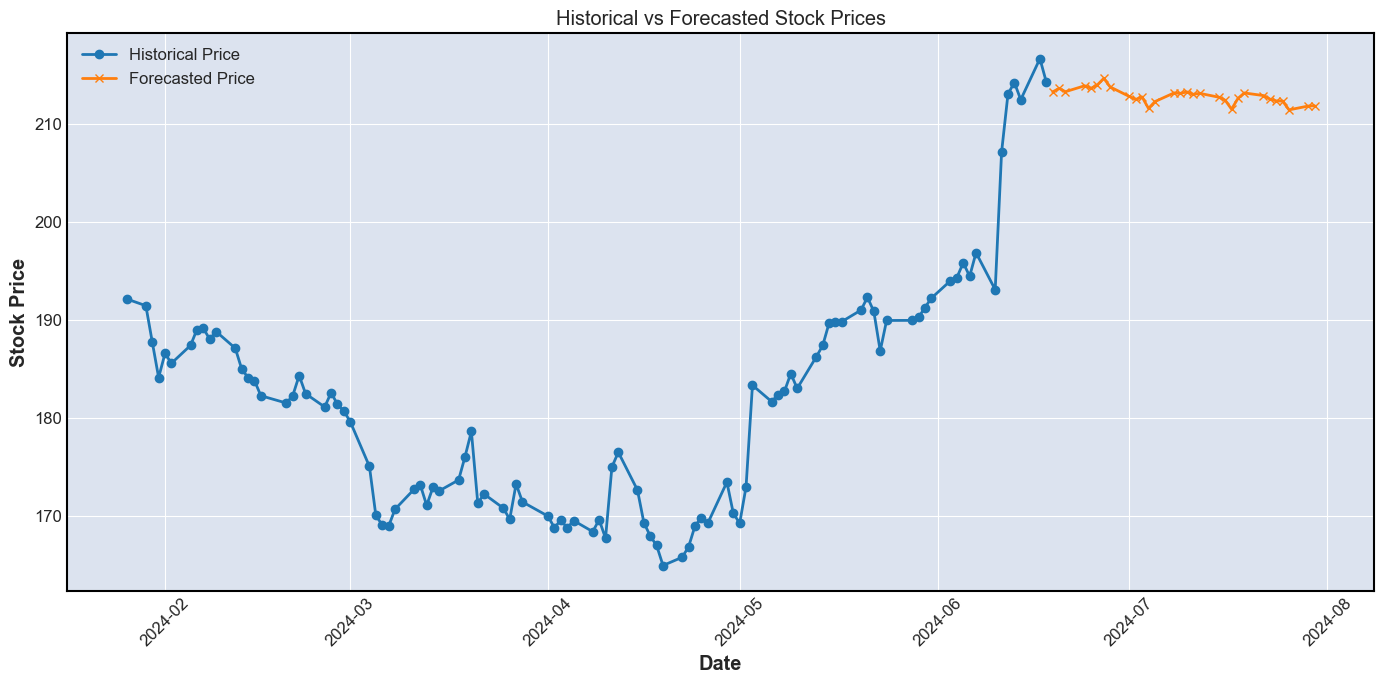

In [96]:

# Forecasting future prices
forecast_days = 30  # Number of days to forecast
last_days = dataset[-time_step:]  # Last time_step days from the dataset

forecast_dates = pd.date_range(start=df.index[-1] + datetime.timedelta(days=1), periods=forecast_days, freq='B')
forecast_dates_str = forecast_dates.strftime('%Y-%m-%d').tolist()

X_forecast = []
for i in range(forecast_days):
    X_forecast.append(last_days[-time_step:, 0])
    next_day_price = model.predict([last_days[-time_step:, 0]])[0]
    last_days = np.append(last_days, next_day_price).reshape(-1, 1)[1:]

forecasted_prices = model.predict(X_forecast)

# Create DataFrame for forecasted prices
forecasted_df = pd.DataFrame({'Date': forecast_dates_str, 'Forecasted Price': forecasted_prices})

# Plotting actual vs forecasted prices
plt.figure(figsize=(14, 7))
plt.plot(df.index[-100:], dataset[-100:], label='Historical Price', marker='o')
plt.plot(forecast_dates, forecasted_prices, label='Forecasted Price', marker='x')
plt.title('Historical vs Forecasted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Display forecasted prices DataFrame
print("\nForecasted Prices:")
print(forecasted_df)

plt.show()


In [103]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')


Root Mean Squared Error (RMSE): 2.9786937265616267


In [104]:
mae = np.mean(np.abs(predictions - y_test))
print(f'Mean Absolute Error (MAE): {mae}')


Mean Absolute Error (MAE): 2.1467203550502085


In [105]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv = np.sqrt(-scores.mean())
print(f'Cross-Validated RMSE: {rmse_cv}')


Cross-Validated RMSE: 1.6327960177571375


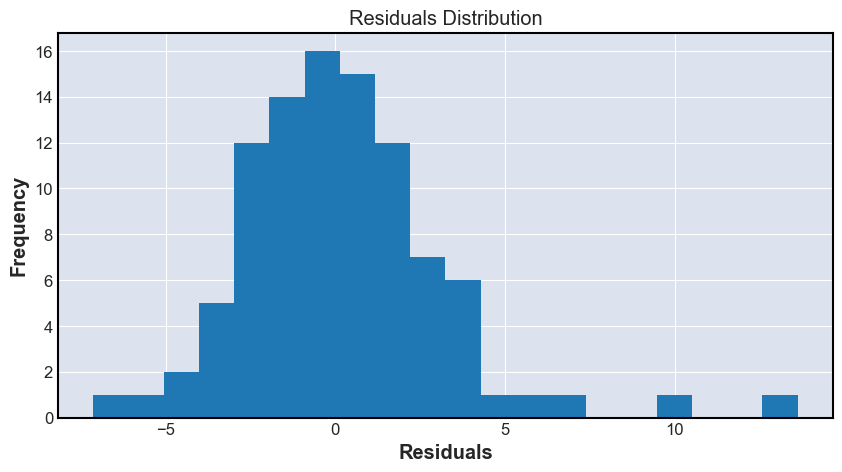

In [106]:
residuals = y_test - predictions
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=20)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
